In [20]:
from salad.serialize import read
from salad.measure.fitting import fit_trajectory
import matplotlib.pyplot as plt
import numpy as np
import astropy.time
import astropy.units as u

In [54]:
i = 21

cluster = read(f"/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_3.0/unshuffled/refined_clusters_2_filtered_joined_split/cluster_{i}_cutouts.pkl")
cluster_fit = read(f"/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_3.0/unshuffled/refined_clusters_2_filtered_joined_split/cluster_{i}_fit_line.pkl")
coadd = read(f"/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_3.0/unshuffled/refined_clusters_2_filtered_joined_split/cluster_{i}_coadd_fit_line.pkl")



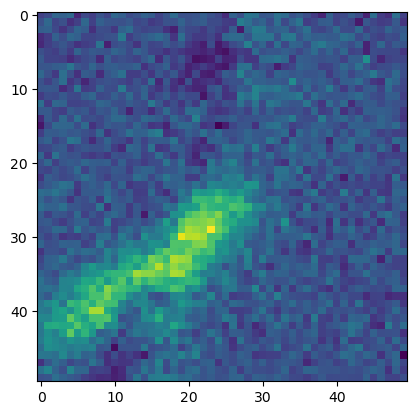

In [55]:
plt.imshow(coadd)

In [12]:
cluster.extra['line'].alpha, cluster.extra['line'].beta

(<Quantity [17162.14662941,  4996.78099783] deg>,
 <Quantity [[-0.2892918 , -0.08549127]] deg / d>)

In [11]:
cluster_fit.extra['line'].alpha, cluster_fit.extra['line'].beta

(<Quantity [17162.14662941,  4996.78099783] deg>,
 <Quantity [[-0.2892918 , -0.08549127]] deg / d>)

In [14]:
images = read("/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/images.pkl")

In [21]:
exposures = np.array([image.exposure for image in images])
# exposures = []
expnums = []
times = []
# cutouts = []
for exposure in exposures:
    visit_info = exposure.getInfo().getVisitInfo()
    time = visit_info.date.toAstropy() + astropy.time.TimeDelta(visit_info.exposureTime / 2 + 0.5, format='sec')
    times.append(time.value)
    expnums.append(visit_info.getId())
times = np.array(times) * u.day
expnums = np.array(expnums)
idx = np.argsort(expnums)
times = times[idx]
expnums = expnums[idx]
exposures = exposures[idx]

In [27]:
import lsst.geom

def _get_positions(line, times):
    positions = (times[:, None] @ line.beta) + line.alpha
    return positions

def get_positions(cluster, times):
    return _get_positions(cluster.extra['line'], times)


positions = get_positions(cluster, times)
points = []
cutout_width = 50
cutout_height = 50
for position, exposure in zip(positions, exposures):
    wcs = exposure.wcs
    exposure_bbox = exposure.getBBox()
    point = wcs.skyToPixel(lsst.geom.SpherePoint(position[0].to(u.deg).value, position[1].to(u.deg).value, units=lsst.geom.degrees))
    points.append(point)

In [73]:
p = np.hstack([line.beta.value.flatten() * (3600)*0.2637, line.alpha.value.flatten() * (3600)*0.2637])
t = times.value
p[0] * t + p[2]

array([205279.53263452, 205279.06265748, 205278.57476124, 205278.10483294,
       205277.63404396, 205277.16278755, 205276.69154266, 205276.21821844,
       205275.74953318, 205275.27812017, 205274.80894093, 205274.33764439,
       205273.86596566, 205273.39466037, 205272.92434147, 205272.45331952,
       205271.98279214, 205271.51243341, 205271.04125645, 205270.56950666,
       205270.09776711, 205269.62795764, 205269.15447135, 205268.68568171,
       205268.21554727, 205267.74339732, 205267.2738124 , 205266.80228717,
       205266.33149634, 205265.85912076, 205265.24443861, 205264.7748904 ,
       205264.30403193, 205263.8326434 , 205263.35875997, 205262.88884828,
       205262.41834047, 205261.94613358, 205261.47560645, 205261.00590231,
       205260.53733598, 205260.06361474, 205259.58648549, 205259.11402093,
       205258.64132654, 205258.12016729, 205257.64717039, 205257.17690559,
       205256.70391761, 205256.23201713, 205255.76085616, 205255.28938683,
       205254.82061616, 2

In [ ]:
def fit_trajectory_sky(es, sky_points, times, trajectory, start=np.array([0, 0]), method="Nelder-Mead"):
    

In [81]:
from salad.measure.fitting import fit_trajectory

line = cluster.extra['line']
start = np.hstack([line.beta.value.flatten(), line.alpha.value.flatten()])
trajectory_fit = fit_trajectory(
    exposures, points, times.value, 
    lambda p, t : (p[0] * t + p[2], p[1] * t + p[3]), 
    start=start
)
trajectory_fit

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 85545.55384177763
             x: [-2.893e-01 -8.549e-02  1.716e+04  4.997e+03]
           nit: 80
          nfev: 227
 final_simplex: (array([[-2.893e-01, -8.549e-02,  1.716e+04,  4.997e+03],
                       [-2.893e-01, -8.549e-02,  1.716e+04,  4.997e+03],
                       ...,
                       [-2.893e-01, -8.549e-02,  1.716e+04,  4.997e+03],
                       [-2.893e-01, -8.549e-02,  1.716e+04,  4.997e+03]]), array([ 8.555e+04,  8.555e+04,  8.555e+04,  8.555e+04,
                        8.555e+04]))

In [75]:
trajectory_fit.x

array([-2.89291817e-01, -8.54912986e-02,  1.71621461e+04,  4.99678070e+03])

In [77]:
ra

array([216.23691285, 216.23641779, 216.23590384, 216.23540883,
       216.23491291, 216.23441649, 216.23392009, 216.2334215 ,
       216.23292779, 216.23243121, 216.23193698, 216.23144053,
       216.23094367, 216.2304472 , 216.22995177, 216.22945561,
       216.22895996, 216.22846449, 216.22796816, 216.22747122,
       216.2269743 , 216.22647941, 216.22598065, 216.22548683,
       216.2249916 , 216.22449424, 216.22399959, 216.22350289,
       216.22300696, 216.22250937, 216.22186187, 216.22136726,
       216.22087126, 216.22037471, 216.21987553, 216.21938053,
       216.2188849 , 216.21838749, 216.21789184, 216.21739706,
       216.21690348, 216.21640447, 216.21590187, 216.21540418,
       216.21490625, 216.21435727, 216.21385902, 216.21336365,
       216.21286541, 216.21236832, 216.211872  , 216.21137537,
       216.21088157, 216.21038395, 216.20988718, 216.20939227,
       216.20889624, 216.20839995, 216.20790511, 216.20740883,
       216.20691339, 216.20641223, 216.20591699, 216.20

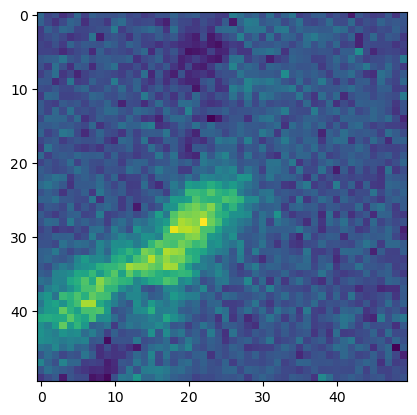

In [84]:
ra, dec = start[:2, None].dot(times.value[:, None].T) + start[2:, None]

points = []
cutouts = []
cutout_width = 50
cutout_height = 50
for (r, d), exposure in zip(zip(ra, dec), exposures):
    wcs = exposure.wcs
    exposure_bbox = exposure.getBBox()
    point = wcs.skyToPixel(lsst.geom.SpherePoint(r, d, units=lsst.geom.degrees))
    points.append(point)
    cutouts.append(
        exposure.getCutout(
#             lsst.geom.Point2D(
#                 point.getX() - cutout_width/2, 
#                 point.getY() - cutout_height/2
#             ), 
            point,
            lsst.geom.Extent2I(cutout_width, cutout_height)
        )
    )
    
plt.imshow(np.mean(list(map(lambda x : x.image.array, cutouts)), axis=0))
plt.show()

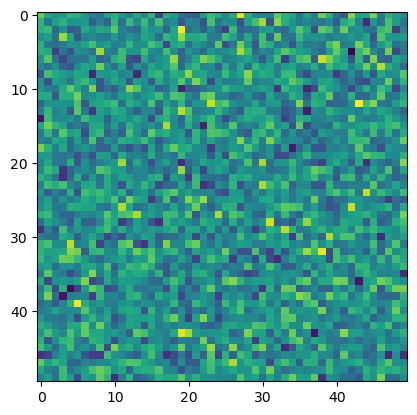

In [85]:
ra, dec = trajectory_fit.x[:2, None].dot(times.value[:, None].T) + trajectory_fit.x[2:, None]

points = []
cutouts = []
cutout_width = 50
cutout_height = 50
for (r, d), exposure in zip(zip(ra, dec), exposures):
    wcs = exposure.wcs
    exposure_bbox = exposure.getBBox()
    point = wcs.skyToPixel(lsst.geom.SpherePoint(r, d, units=lsst.geom.degrees))
    points.append(point)
    cutouts.append(
        exposure.getCutout(
            point,
            lsst.geom.Extent2I(cutout_width, cutout_height)
        )
    )
    
plt.imshow(np.mean(list(map(lambda x : x.image.array, cutouts)), axis=0))
plt.show()

In [89]:
catalog = read(f"/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_3.0/catalog.pkl")
catalog.X()

array([[ 2.15984984e+02, -1.10094220e+01,  5.85773416e+04],
       [ 2.15985137e+02, -1.10085472e+01,  5.85773416e+04],
       [ 2.15984527e+02, -1.11150603e+01,  5.85773416e+04],
       ...,
       [ 2.16284366e+02, -1.10331701e+01,  5.85772637e+04],
       [ 2.16284723e+02, -1.10765958e+01,  5.85772637e+04],
       [ 2.16284678e+02, -1.10884729e+01,  5.85772637e+04]])

In [90]:
from salad.gather import gather

In [105]:
cluster.points[:, 0].shape

(18,)

In [114]:
cluster.points[:, 0].shape

(52,)

In [120]:
catalog.X(columns=['exposure'])

AttributeError: 'int' object has no attribute 'data'

In [238]:
from salad.refine import refine
from salad.gather import gather
from salad.cluster.filter import filter_velocity, filter_n
from salad.cluster.cluster import Cluster
from salad.analysis.plot import plot_cluster, plot_result

In [374]:
catalog = read(f"/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_3.0/catalog.pkl")
x = catalog.X()
ra = x[:, 0]
dec = x[:, 1]
time = x[:, 2]

clusters = read(
    f"/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_3.0/unshuffled/clusters.pkl"
)
len(clusters.clusters)

1254

In [386]:

def iterative_refine(cluster):
#     plot_cluster(cluster)
#     plt.show()

    refined = refine(cluster)
    refined.beta *= u.deg/u.day
    refined.alpha *= u.deg

#     plot_result(refined, np.linspace(time.min(), time.max(), 100), color="C1")
    gathered = x[gather(refined, ra * u.deg, dec * u.deg, time * u.day, 5 * u.arcsec)]
    cluster = Cluster(gathered, {"line": refined})
#     plot_cluster(clusters.clusters[i], s=1, c='k')
#     plot_cluster(cluster)
#     plt.show()

    refined = refine(cluster)
    refined.beta *= u.deg/u.day
    refined.alpha *= u.deg

#     plot_result(refined, np.linspace(time.min(), time.max(), 100), color="C1")
    gathered = x[gather(refined, ra * u.deg, dec * u.deg, time * u.day, 3 * u.arcsec)]
    cluster = Cluster(gathered, {"line": refined})
#     plot_cluster(clusters.clusters[i], s=1, c='k')
#     plot_cluster(cluster)
#     plt.show()

    refined = refine(cluster)
    refined.beta *= u.deg/u.day
    refined.alpha *= u.deg

#     plot_result(refined, np.linspace(time.min(), time.max(), 100), color="C1")
    gathered = x[gather(refined, ra * u.deg, dec * u.deg, time * u.day, 1 * u.arcsec)]
    cluster = Cluster(gathered, {"line": refined})
#     plot_cluster(clusters.clusters[i], s=1, c='k')
#     plot_cluster(cluster)
#     plt.show()

    refined = refine(cluster)
    refined.beta *= u.deg/u.day
    refined.alpha *= u.deg

#     plot_result(refined, np.linspace(time.min(), time.max(), 100), color="C1")
    gathered = x[gather(refined, ra * u.deg, dec * u.deg, time * u.day, 3 * u.arcsec)]
    cluster = Cluster(gathered, {"line": refined})
#     plot_cluster(clusters.clusters[i], s=1, c='k')
#     plot_cluster(cluster)
#     plt.show()

In [391]:
%%time
cluster = clusters.clusters[2]
iterative_refine(cluster)

CPU times: user 427 ms, sys: 13.3 ms, total: 440 ms
Wall time: 571 ms


In [ ]:
# at some point I assume I have the trajectory right
# there should be a relationship between how bright an object is and the residuals from the trajectory
# this actually makes filtering by the number of detections a bit fraught...
# or even doing the gathering...

# I pick the cluster width so that more than half of my points are real vs fake
# sigma_ra ~ 1/SNR
# sigma_x^2 = S_psf() x (f^2/sigma^2)^-1
# sigma_x^2 -> 2 s^2 (f^2/sigma^2)^(-1)
# sigma_x -> sqrt(2) s/SNR

In [368]:
# https://iopscience.iop.org/article/10.3847/1538-3881/ab76ba/pdf
# we expect ~0.2 arcsec position errors with 1 arcsec seeing
fwhm = 1 # arcsec
s = fwhm / 2.355
print("fwhm =", fwhm, "arcsec")
print("s =", s, "arcsec")
print("snr", "sigma_x")
for snr in [100, 10, 5, 4, 3, 2, 1]:
    sigma_x = (2 * s**2 / snr**2)**0.5
    print(str(snr).ljust(3, " "), sigma_x)

fwhm = 1 arcsec
s = 0.42462845010615713 arcsec
snr sigma_x
100 0.006005153131095946
10  0.06005153131095945
5   0.1201030626219189
4   0.15012882827739862
3   0.2001717710365315
2   0.30025765655479725
1   0.6005153131095945


In [1]:
((0.1201030626219189**2)*2)**0.5

0.16985138004246284

In [ ]:
# for a SNR=3 object we expect it to appear N/2 times in an SNR=3 catalog
# we expect it to have M detections within 1 arcsec of the true trajectory with probability 99%
# each detection will be a draw from a N(0, 0.20) distribution
# what is the probability that one detection falls within 1 arcsec?
# this is 1 - the probability that it falls outside of 1 arcsec
# this is 1 - 2 * CDF(-0.5)
# what is the probability that M detections falls within 1 arcsec

In [337]:
import scipy.stats
N = 100
Ndet = N/2
dx = 1
dist = scipy.stats.norm(loc=0, scale=0.20)
prob_below = dist.cdf(-dx)
prob_outside = 2 * prob_below
prob_inside = (1 - prob_outside)
prob_all_inside = prob_inside**Ndet
for n in range(1, int(N) + 1):
    print(n, prob_inside**n)

1 0.9999994266968563
2 0.9999988533940412
3 0.9999982800915548
4 0.9999977067893971
5 0.9999971334875681
6 0.9999965601860678
7 0.999995986884896
8 0.9999954135840531
9 0.9999948402835387
10 0.999994266983353
11 0.9999936936834961
12 0.9999931203839678
13 0.9999925470847681
14 0.9999919737858972
15 0.9999914004873549
16 0.9999908271891413
17 0.9999902538912564
18 0.9999896805937001
19 0.9999891072964725
20 0.9999885339995735
21 0.9999879607030033
22 0.9999873874067617
23 0.9999868141108489
24 0.9999862408152647
25 0.9999856675200091
26 0.9999850942250822
27 0.9999845209304841
28 0.9999839476362145
29 0.9999833743422736
30 0.9999828010486614
31 0.9999822277553779
32 0.999981654462423
33 0.9999810811697969
34 0.9999805078774994
35 0.9999799345855305
36 0.9999793612938903
37 0.9999787880025789
38 0.999978214711596
39 0.9999776414209418
40 0.9999770681306164
41 0.9999764948406196
42 0.9999759215509514
43 0.9999753482616119
44 0.9999747749726011
45 0.9999742016839189
46 0.9999736283955655
4

In [395]:
prob_outside

0.006209665325776114

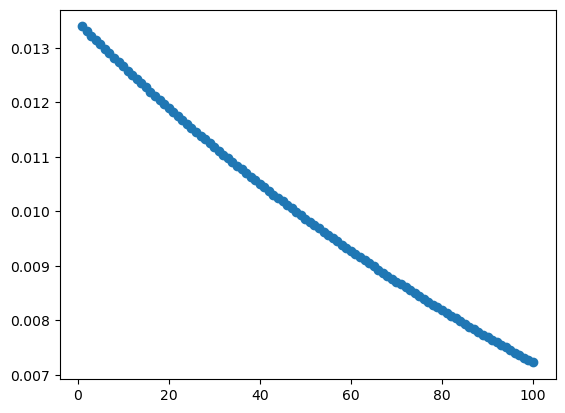

In [402]:
# now do this for a 2D gaussian...
# what is the probability that a point lies at most dx from the center?
# i.e. what is the volume below the PDF bound by a circle of size dx
N = 100
Ndet = N/2
dx = 1
sigma = 0.20
dist = scipy.stats.multivariate_normal(mean=[0, 0], cov=[[sigma**2, 0], [0, sigma**2]])
prob_below = dist.cdf([-dx/2, 0])
prob_outside = 2 * prob_below
prob_inside = (1 - prob_outside)
prob_all_inside = prob_inside**Ndet
Z = 0
ns = []
ps = []
for n in range(1, int(N) + 1):
    p = (prob_inside**n)#*(prob_outside**(N - n))
    Z += p
    ps.append(p)
    ns.append(n)

ps = np.array(ps)
Z
plt.scatter(ns, ps/Z)
# for n in range(1, int(N) + 1):
#     print(n, prob_inside**n)

97.0

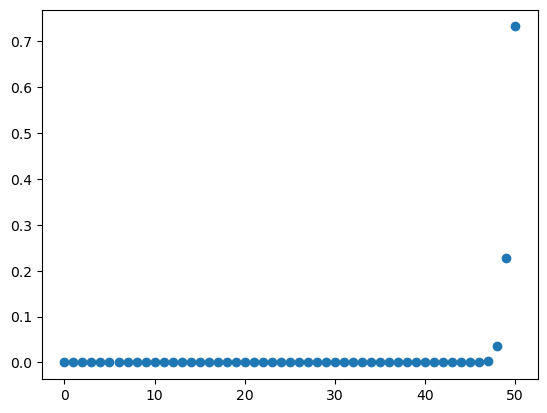

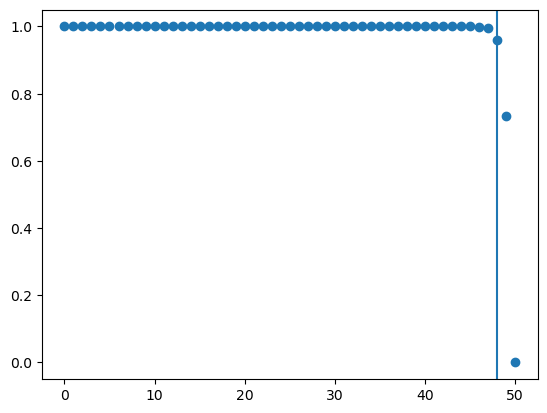

In [486]:
N = 100
Ndet = N/2
dx = 1
sigma = 0.20
dist = scipy.stats.multivariate_normal(mean=[0, 0], cov=[[sigma**2, 0], [0, sigma**2]])
prob_below = dist.cdf([-dx/2, 0])
prob_outside = 2 * prob_below
prob_inside = 1 - prob_outside
k = np.arange(Ndet + 1)
plt.scatter(k, scipy.stats.binom.pmf(k, Ndet, prob_inside))
plt.show()
plt.scatter(k, 1 - scipy.stats.binom.cdf(k, Ndet, prob_inside))
plt.axvline(scipy.stats.binom(Ndet, prob_inside).isf(0.99))
plt.show()
# plt.scatter(k, scipy.stats.binom(N, prob_inside).isf(k))
# plt.show()

In [489]:
# a SNR=3 object will be detected with 99% probability at least 48 times within 1 arcsec of the best fit line
scipy.stats.binom(Ndet, prob_inside).isf(0.99) 


48.0

In [ ]:
# a SNR=3 object will be detected with 99% probability at least 48 times within 1 arcsec of the best fit line
scipy.stats.binom(Ndet, prob_inside).isf(0.99) 

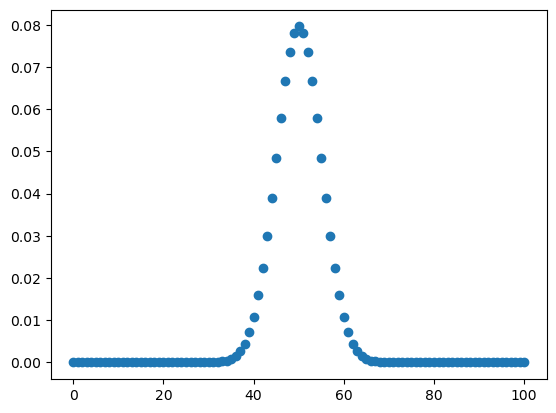

In [491]:
# how often does a SNR=2 object appear in an SNR=3 catalog?
# what is the distribution of number of times it is detected?
# what is the probability it is detected in a single image?
# It's poisson distributed, no?
# why does it appear in half the images? 
# the probabilty has to be half 
N = 100
k = np.arange(N + 1)
p = 0.5
plt.scatter(k, scipy.stats.binom(N, p).pmf(k))
plt.show()

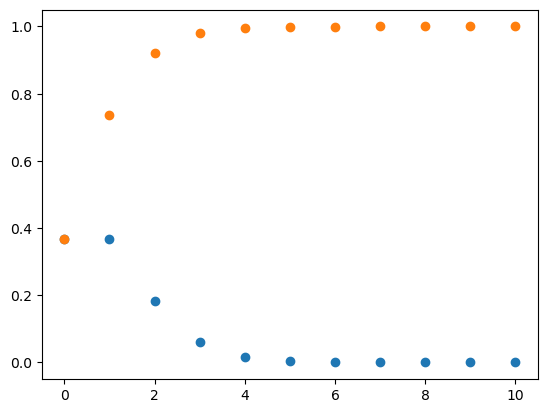

In [494]:
# why is the probability half?
# because we assume the distribution is symmetric above the cutoff?
# what is the probability distribution of SNR for a given object?
f = np.arange(11)
plt.scatter(f, scipy.stats.poisson(1).pmf(f))
plt.scatter(f, scipy.stats.poisson(1).cdf(f))
plt.show()

In [497]:
scipy.stats.poisson(1).sf(5) # this is the probability that an SNR~1 object appears in a SNR~5 catalog, no?

0.000594184817581693

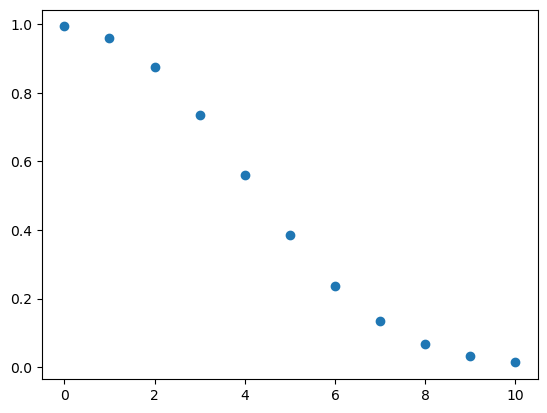

In [505]:
f = np.arange(11)
plt.scatter(f, scipy.stats.poisson(5).sf(f))
plt.show()

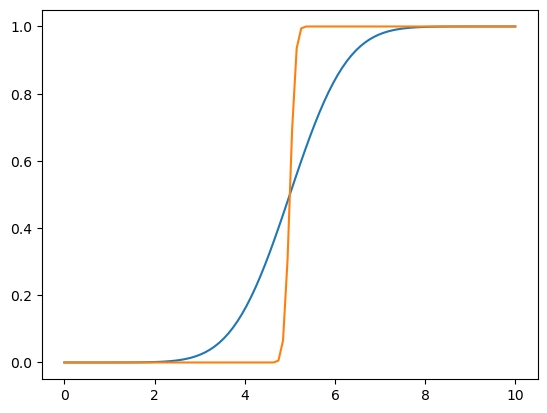

In [511]:
f_thresh = 5
k = 100
f = np.linspace(0, 10, 100)
plt.plot(f, 0.5 * scipy.special.erfc((f_thresh - f)/np.sqrt(2)))
plt.plot(f, 0.5 * scipy.special.erfc((f_thresh - f)/np.sqrt(2/k)))
plt.show()

In [452]:
scipy.stats.binom(N, prob_inside).pmf(N) # probability that at least N are found

0.5363852915711518

In [473]:
scipy.stats.hypergeom(N, N, N)

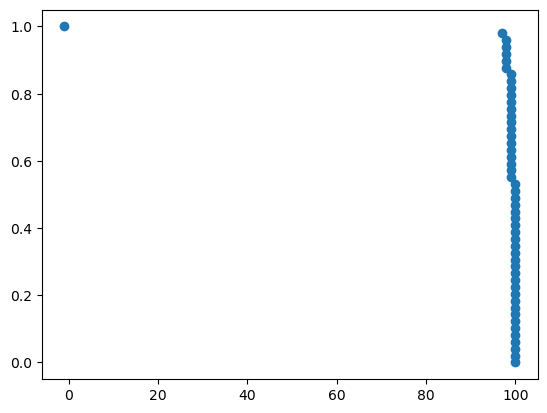

In [466]:
x = np.linspace(0, 1)
plt.scatter(scipy.stats.binom(N, prob_inside).isf(x), x,)
plt.show()

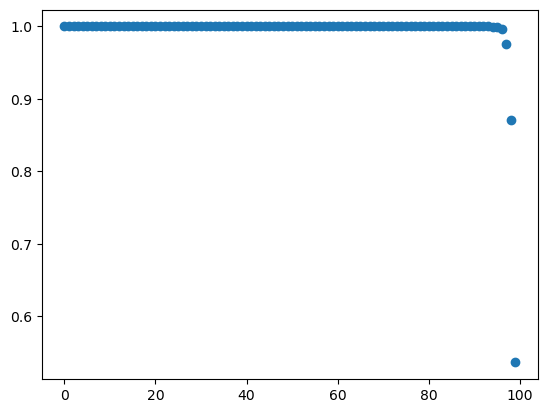

In [347]:
dist = scipy.stats.multivariate_normal(mean=mean, cov=cov)
prob_below = dist.cdf([0, 0])
prob_below

0.25

In [367]:
dx**2 / sigma_x**2, md

(24.999999999999996, 24.999999999999996)

In [369]:
prob_inside

0.999996273346828

In [372]:
dx = 1
sigma_x = 0.20
mean = np.array([0, 0])
cov = np.array(
    [
        [sigma_x**2, 0], 
        [0, sigma_x**2]
    ]
)

x = np.array([0, dx])
md = (mean - x).T @ np.linalg.inv(cov) @ (mean - x) # mahalanobis distance
# dx**2 / sigma_x**2
prob_inside = scipy.stats.chi2(2).cdf(md) # probability to get a point that is this far away
for n in range(1, int(N) + 1):
    print(n, prob_inside**n)

1 0.999996273346828
2 0.9999925467075438
3 0.9999888200821476
4 0.9999850934706392
5 0.9999813668730186
6 0.9999776402892858
7 0.9999739137194407
8 0.9999701871634831
9 0.9999664606214131
10 0.9999627340932308
11 0.9999590075789357
12 0.9999552810785283
13 0.9999515545920081
14 0.9999478281193753
15 0.9999441016606297
16 0.9999403752157714
17 0.9999366487848003
18 0.9999329223677162
19 0.9999291959645192
20 0.9999254695752092
21 0.9999217431997862
22 0.9999180168382501
23 0.9999142904906009
24 0.9999105641568384
25 0.9999068378369628
26 0.9999031115309738
27 0.9998993852388715
28 0.9998956589606557
29 0.9998919326963266
30 0.9998882064458838
31 0.9998844802093276
32 0.9998807539866578
33 0.9998770277778742
34 0.9998733015829769
35 0.999869575401966
36 0.9998658492348412
37 0.9998621230816025
38 0.9998583969422499
39 0.9998546708167834
40 0.9998509447052027
41 0.999847218607508
42 0.9998434925236993
43 0.9998397664537763
44 0.9998360403977391
45 0.9998323143555876
46 0.9998285883273218


In [346]:
scipy.stats.chi2(0.01)

fwhm = 1 arcsec
s = 0.42462845010615713 arcsec
snr sigma_x
100 0.006005153131095946
10  0.06005153131095945
5   0.1201030626219189
4   0.15012882827739862
3   0.2001717710365315
2   0.30025765655479725
1   0.6005153131095945


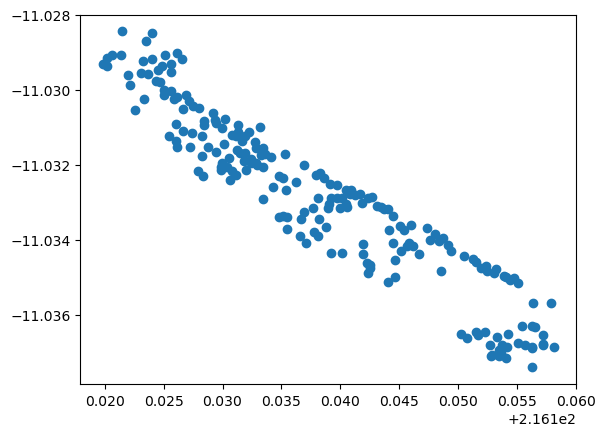

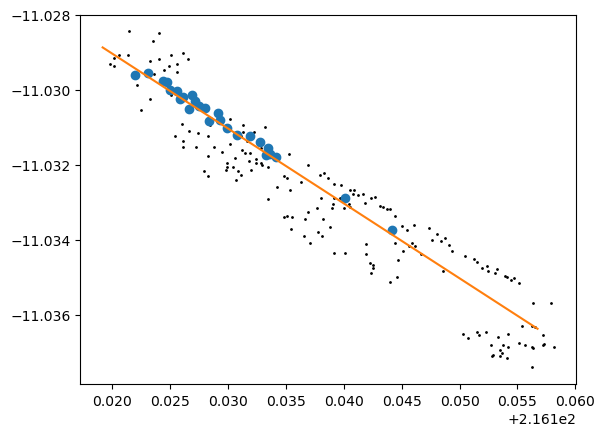

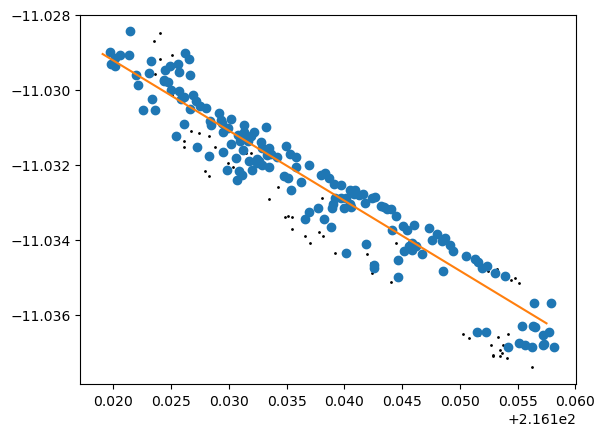

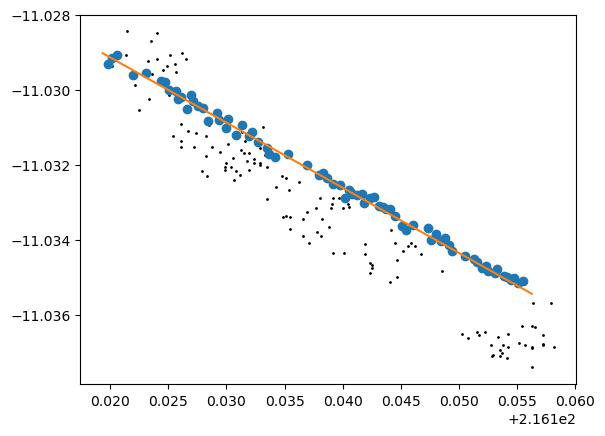

In [268]:
cluster = clusters.clusters[0]
plot_cluster(cluster)
plt.show()

refined = refine(cluster)
refined.beta *= u.deg/u.day
refined.alpha *= u.deg

plot_result(refined, np.linspace(time.min(), time.max(), 100), color="C1")
gathered = x[gather(refined, ra * u.deg, dec * u.deg, time * u.day, 1 * u.arcsec)]
cluster = Cluster(gathered, {"line": refined})
plot_cluster(clusters.clusters[0], s=1, c='k')
plot_cluster(cluster)
plt.show()

refined = refine(cluster)
refined.beta *= u.deg/u.day
refined.alpha *= u.deg

plot_result(refined, np.linspace(time.min(), time.max(), 100), color="C1")
gathered = x[gather(refined, ra * u.deg, dec * u.deg, time * u.day, 5 * u.arcsec)]
cluster = Cluster(gathered, {"line": refined})
plot_cluster(clusters.clusters[0], s=1, c='k')
plot_cluster(cluster)
plt.show()

refined = refine(cluster)
refined.beta *= u.deg/u.day
refined.alpha *= u.deg

plot_result(refined, np.linspace(time.min(), time.max(), 100), color="C1")
gathered = x[gather(refined, ra * u.deg, dec * u.deg, time * u.day, 1 * u.arcsec)]
cluster = Cluster(gathered, {"line": refined})
plot_cluster(clusters.clusters[0], s=1, c='k')
plot_cluster(cluster)
plt.show()

# refined = refine(cluster)
# refined.beta *= u.deg/u.day
# refined.alpha *= u.deg

# plot_result(refined, np.linspace(time.min(), time.max(), 100), color="C1")
# gathered = x[gather(refined, ra * u.deg, dec * u.deg, time * u.day, 3 * u.arcsec)]
# cluster = Cluster(gathered, {"line": refined})
# plot_cluster(clusters.clusters[0], s=1, c='k')
# plot_cluster(cluster)
# plt.show()

In [ ]:
# refine
refined_1 = []
for cluster in clusters:
    refined = refine(cluster)
    refined.beta *= u.deg/u.day
    refined.alpha *= u.deg
    refined_1.append(refined)


In [224]:
# gather 1 arcsec
gather_1 = []
for refined in refined_1:
    gathered = x[gather(refined, ra * u.deg, dec * u.deg, time * u.day, 5 * u.arcsec)]
    cluster = Cluster(gathered, {"line": refined})
    gather_1.append(cluster)

In [233]:
# filter
filtered_1 = list(filter(lambda x : filter_n(x, n=5), gather_1))
# filtered_1 = list(filter(lambda x: filter_velocity(x, vmin=0.1, vmax=0.5), filtered_1))
len(filtered_1)

1254

In [218]:
# refine
# gather 5 arcsec
refined_2 = []
for cluster in filtered_1:
    refined = refine(cluster)
    refined.beta *= u.deg/u.day
    refined.alpha *= u.deg
    refined_2.append(refined)

In [ ]:
gather_2 = []
for refined in refined_2:
    gathered = x[gather(refined, ra * u.deg, dec * u.deg, time * u.day, 1 * u.arcsec)]
    cluster = Cluster(gathered, {"line": refined})
    gather_2.append(cluster)


In [222]:
filtered_2 = list(filter(lambda x : filter_n(x, n=10), gather_2))
filtered_2 = list(filter(lambda x: filter_velocity(x, vmin=0.1, vmax=0.5), filtered_2))
len(filtered_2)

81

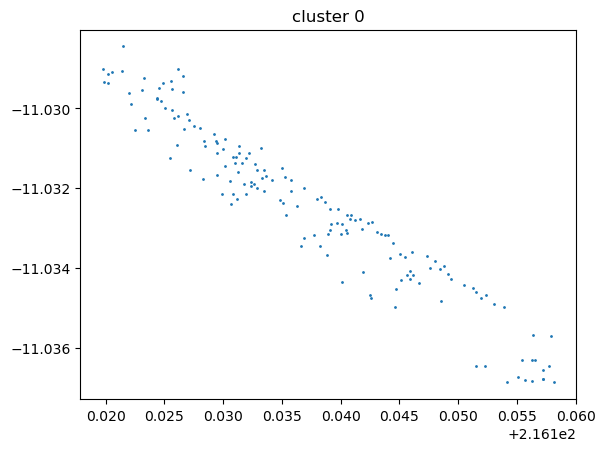

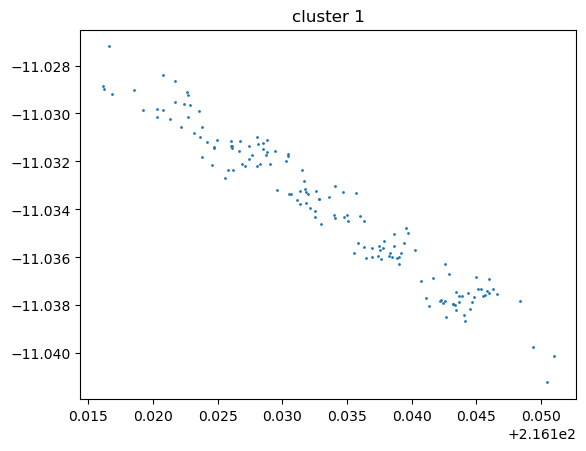

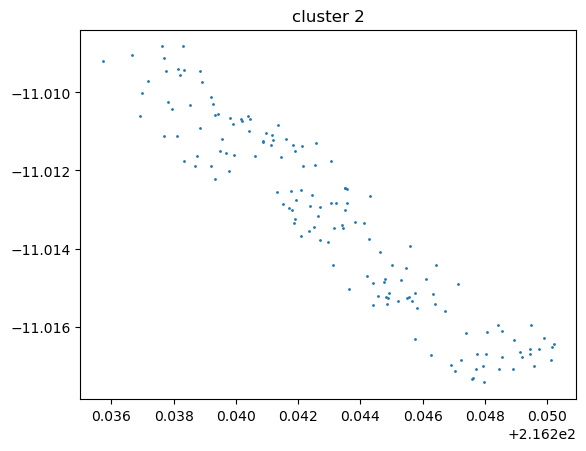

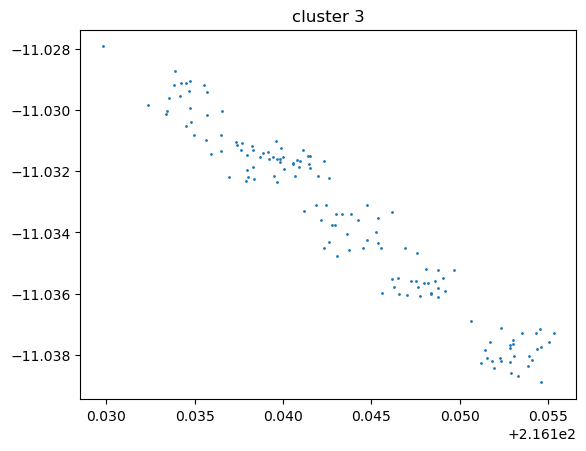

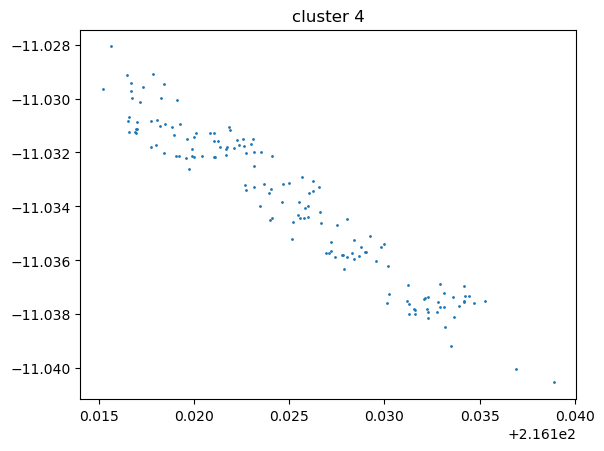

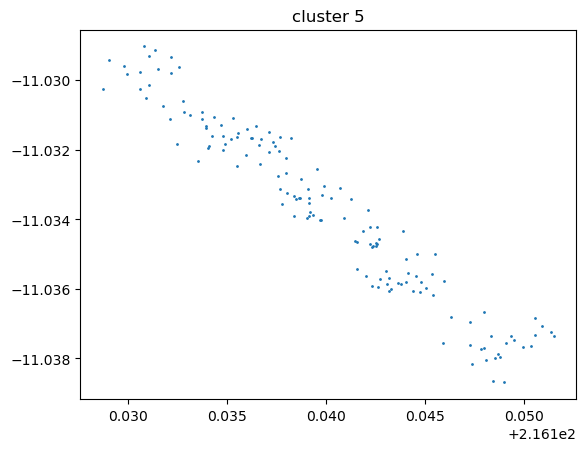

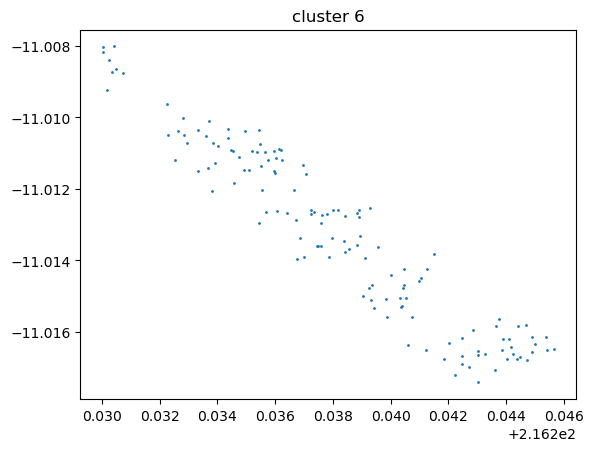

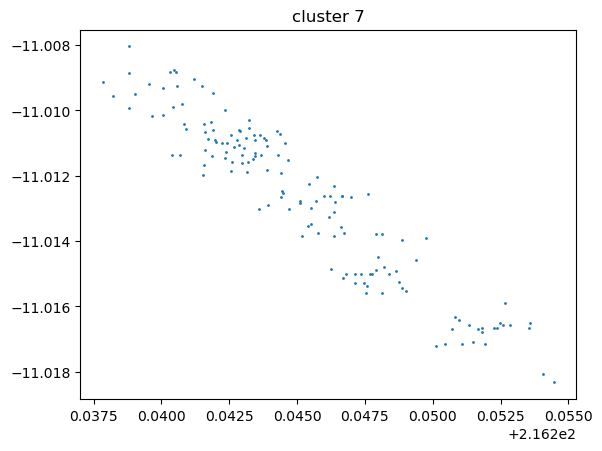

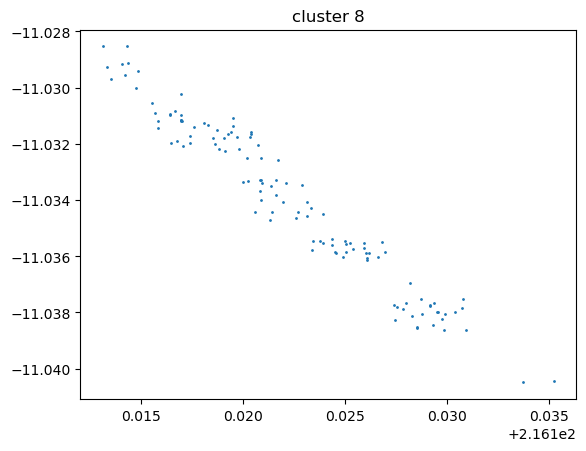

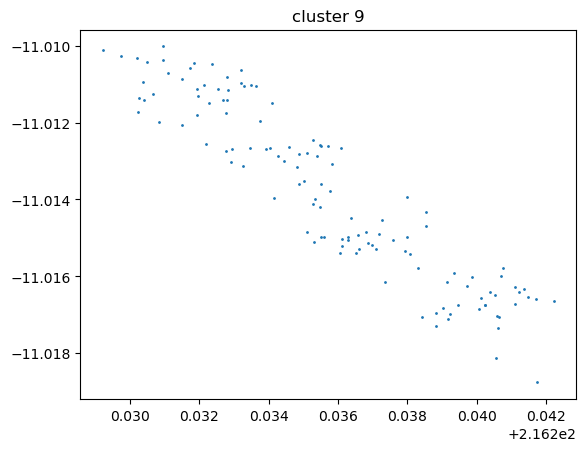

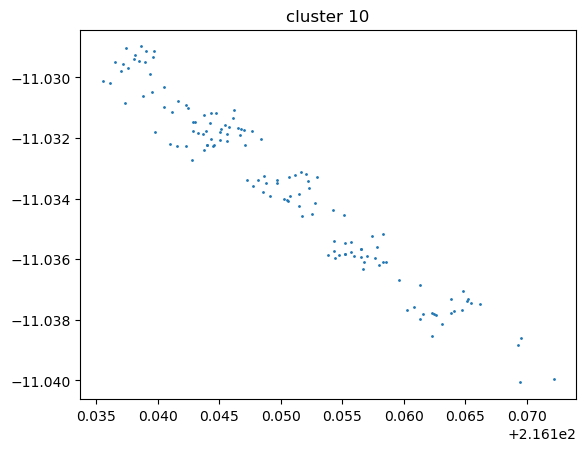

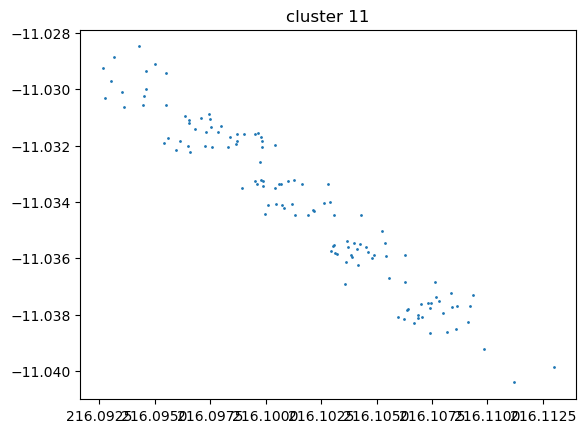

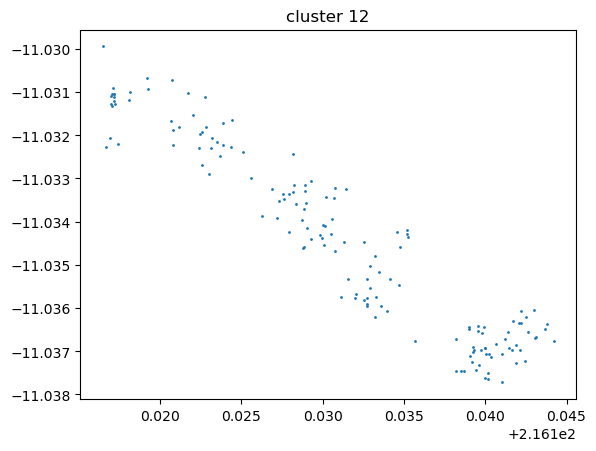

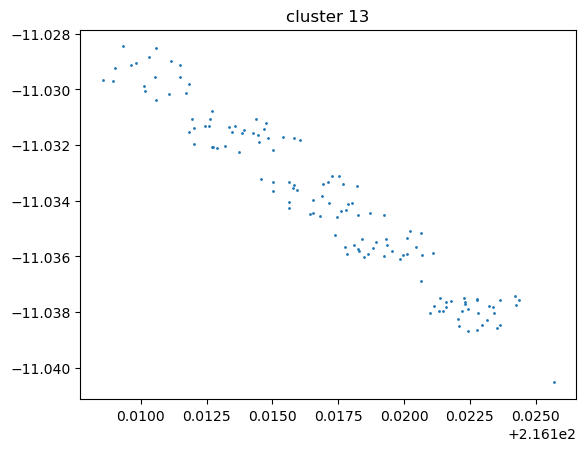

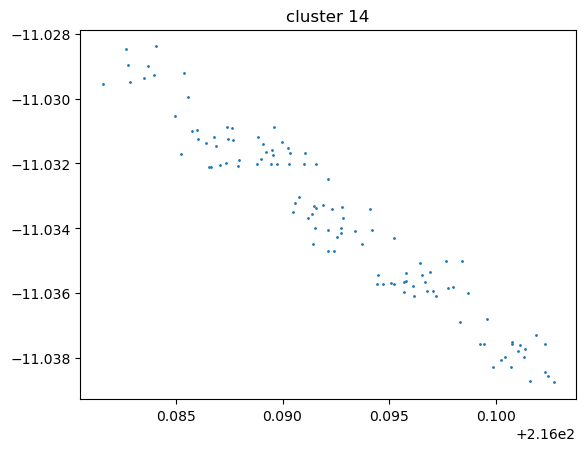

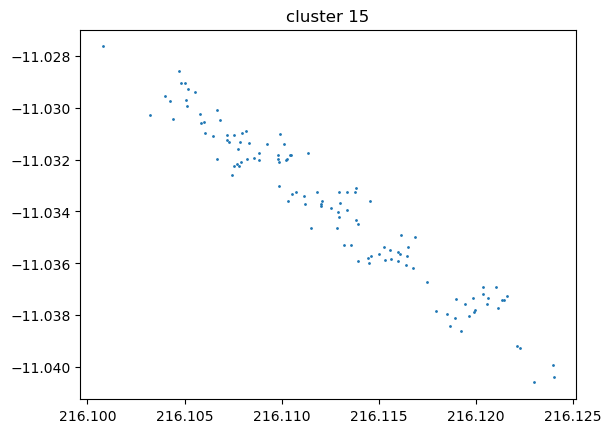

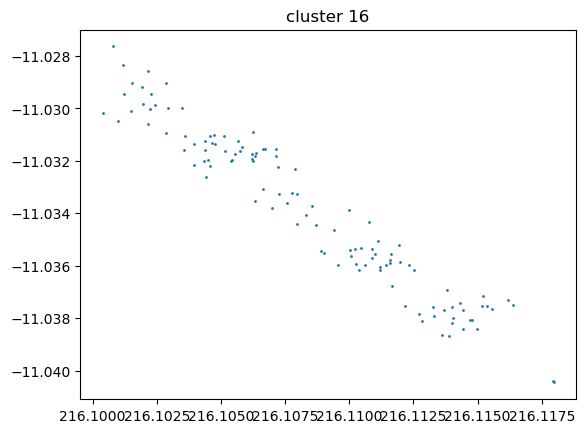

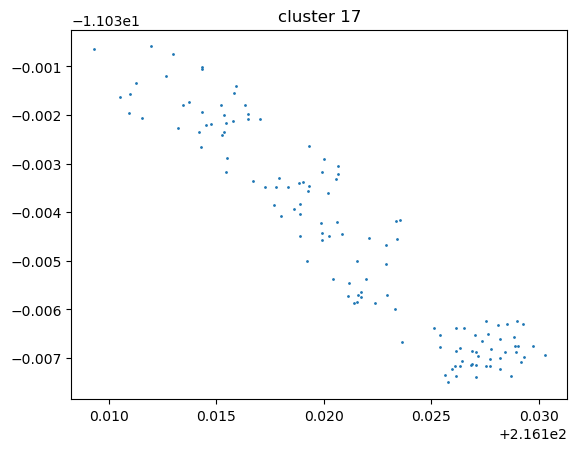

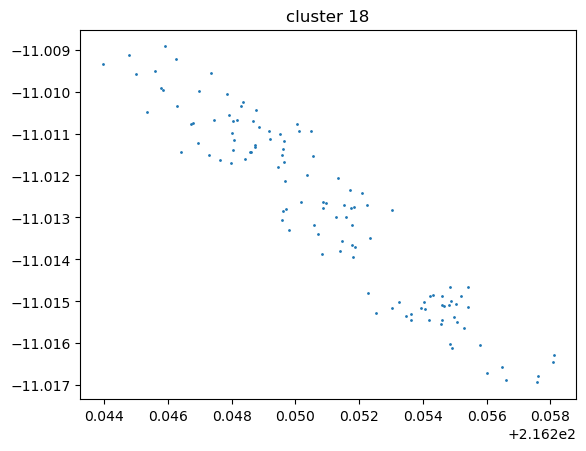

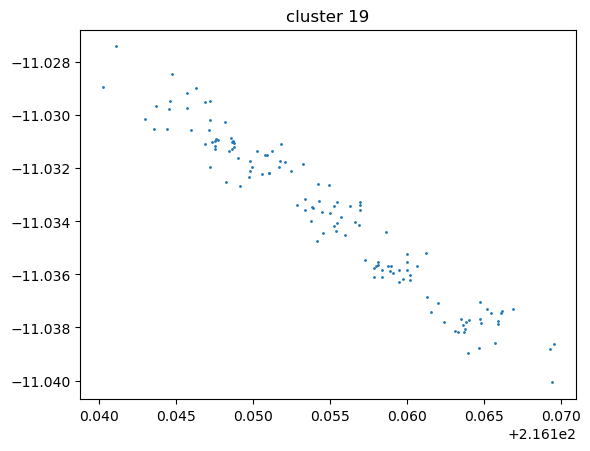

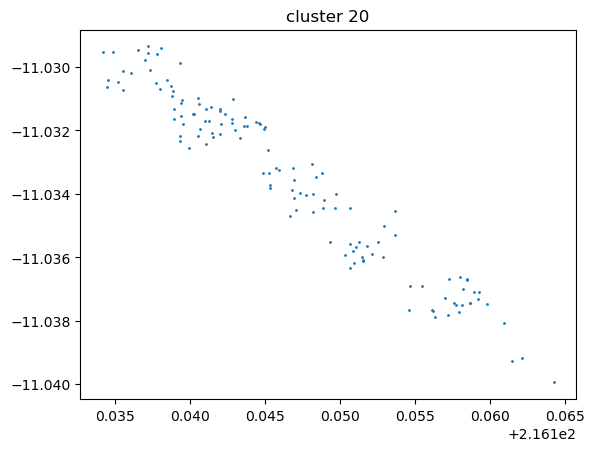

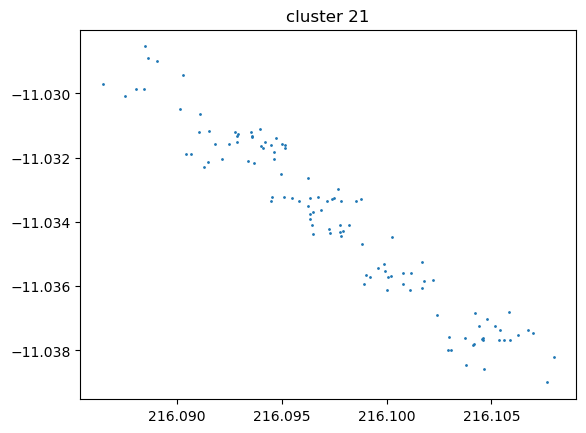

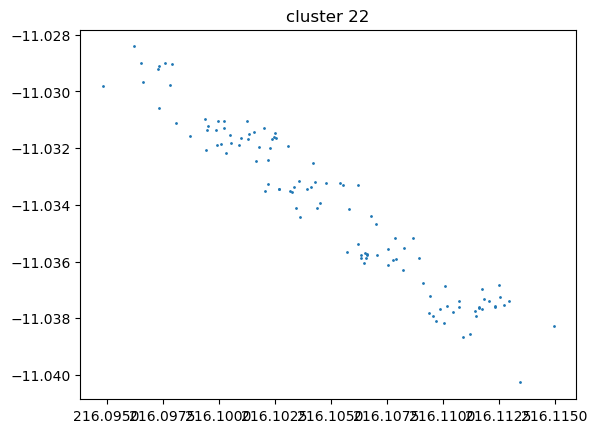

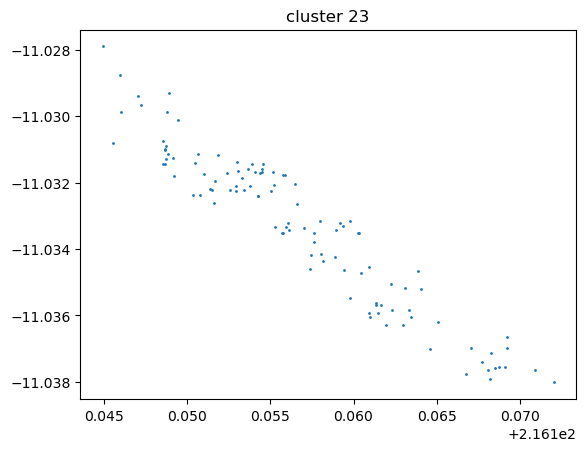

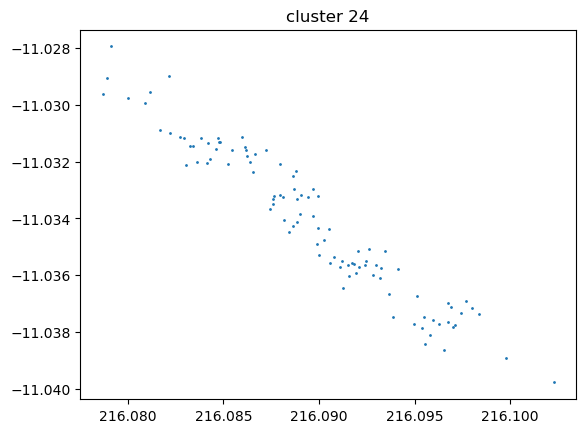

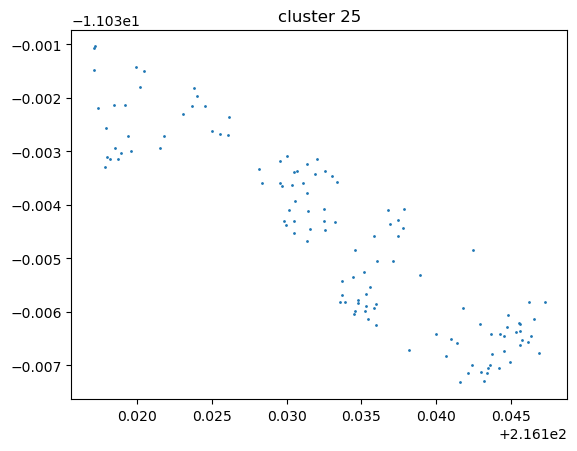

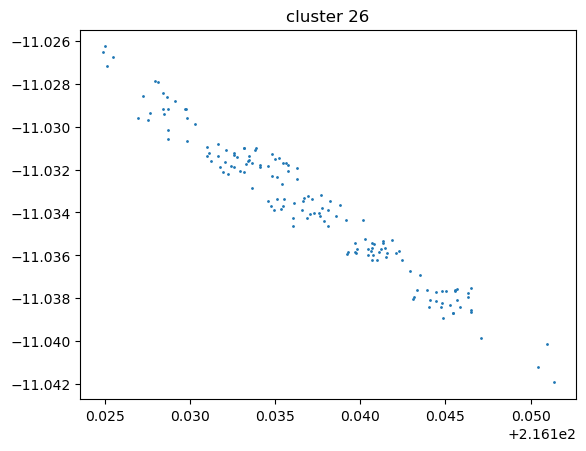

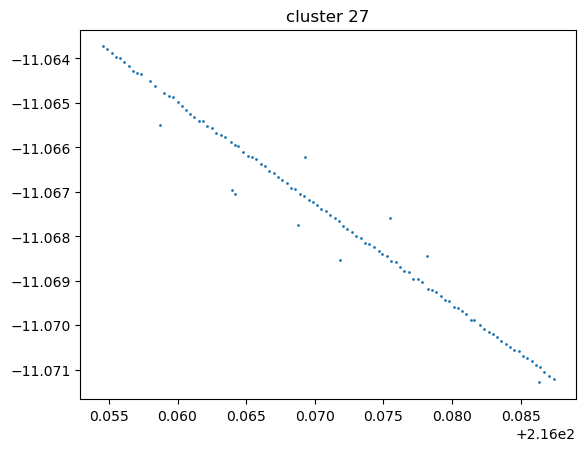

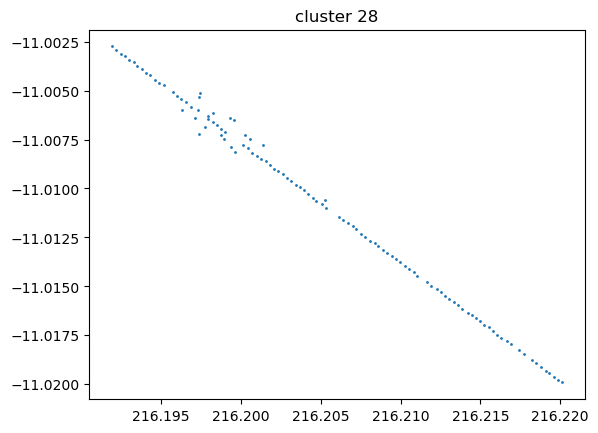

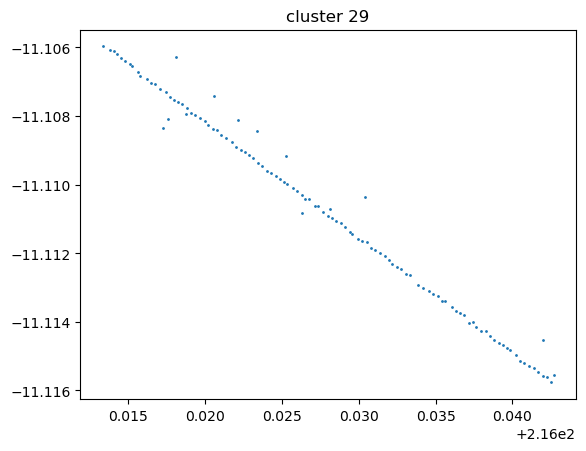

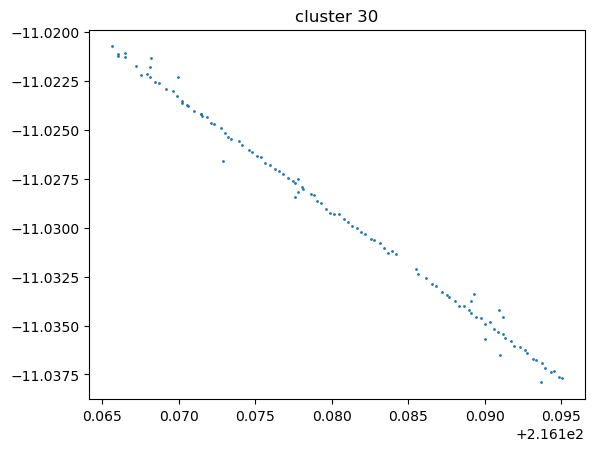

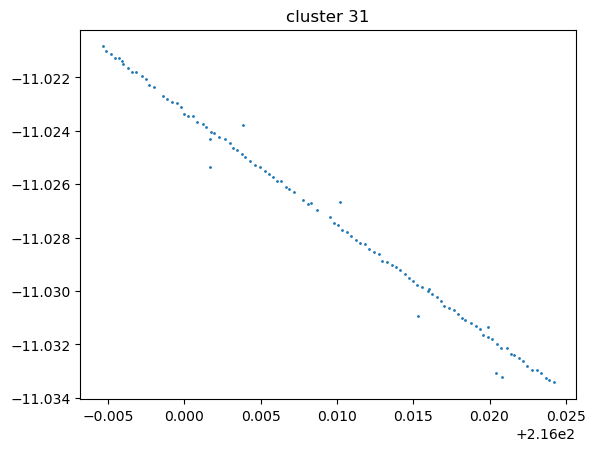

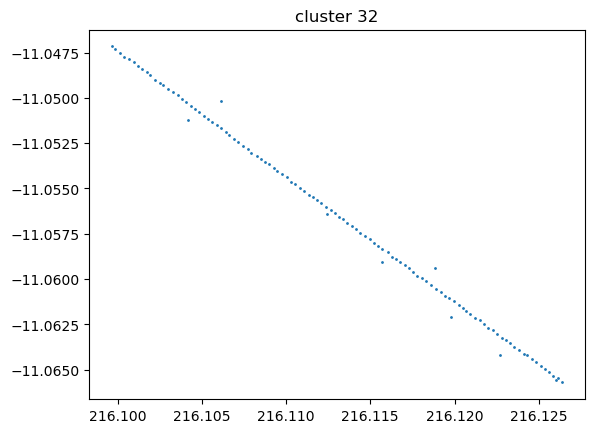

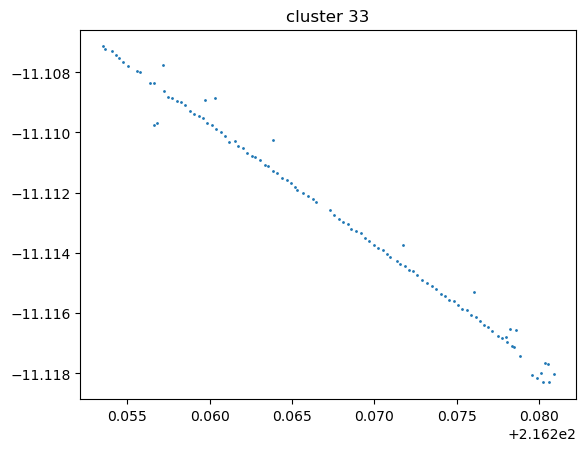

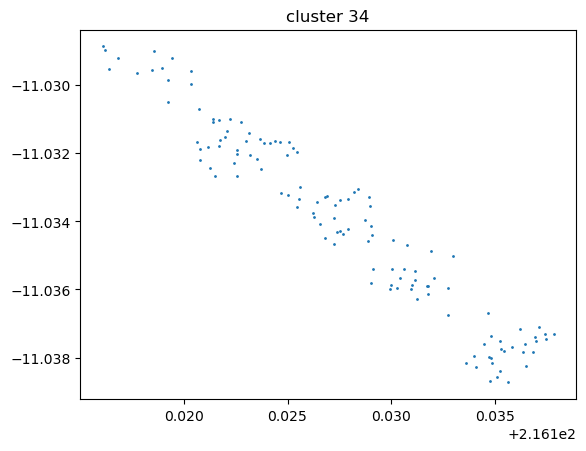

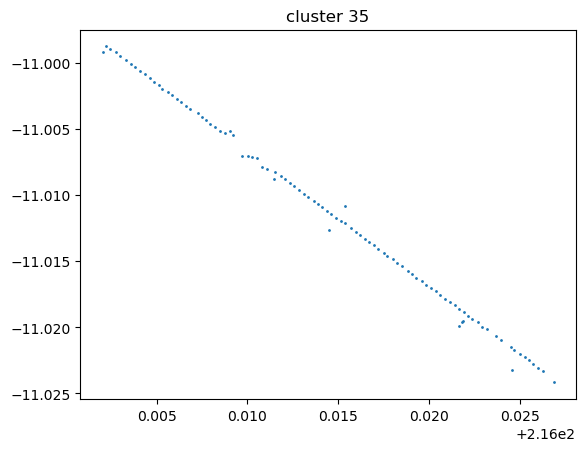

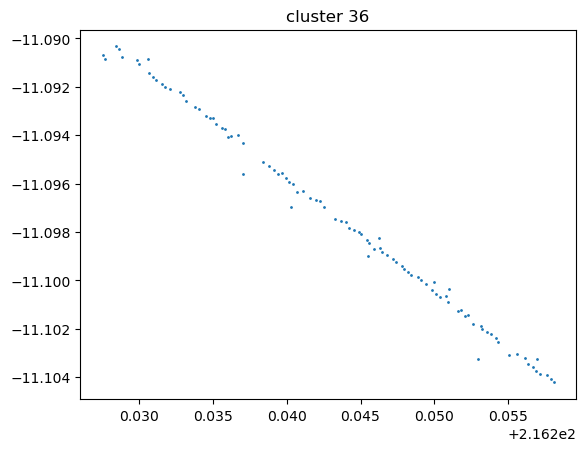

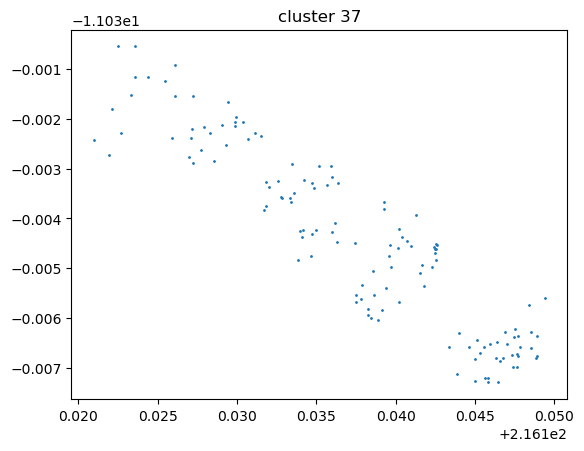

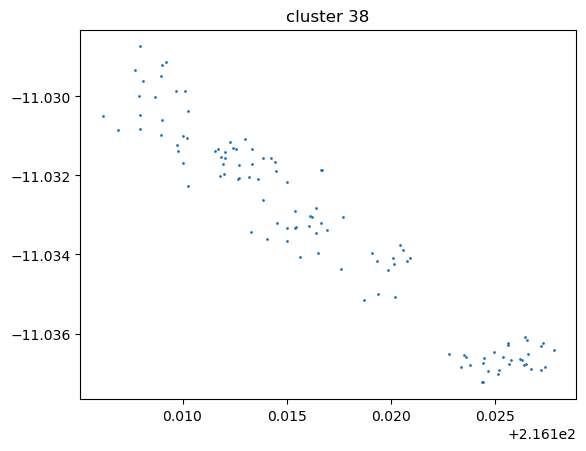

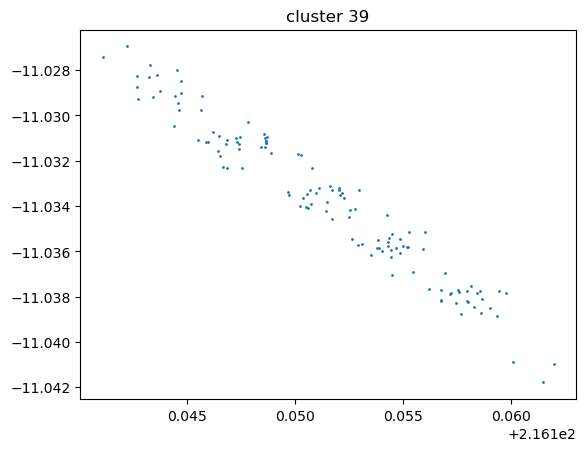

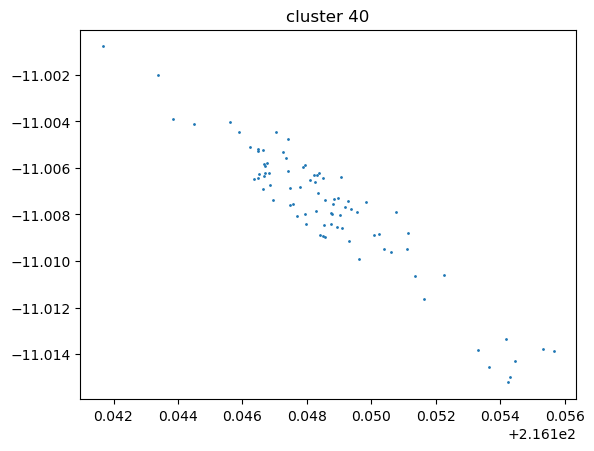

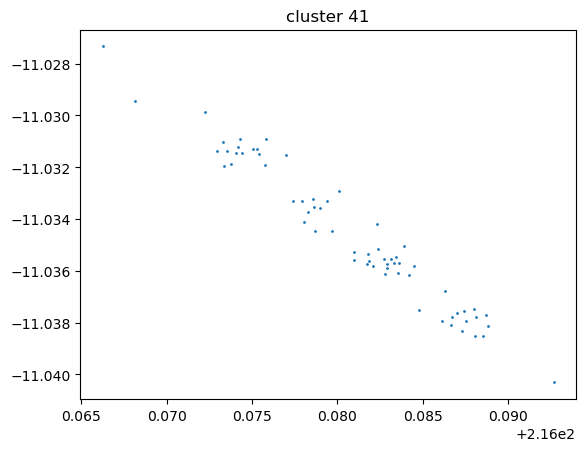

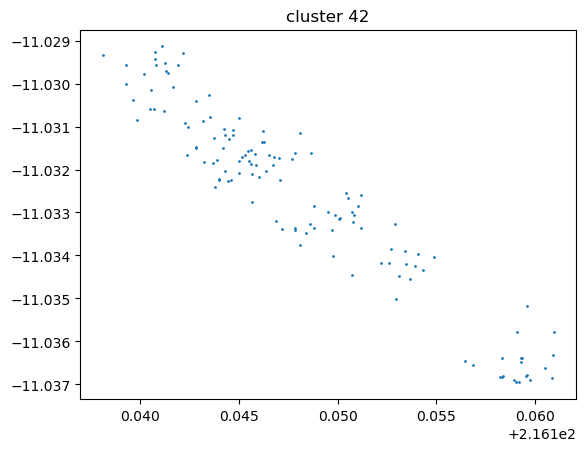

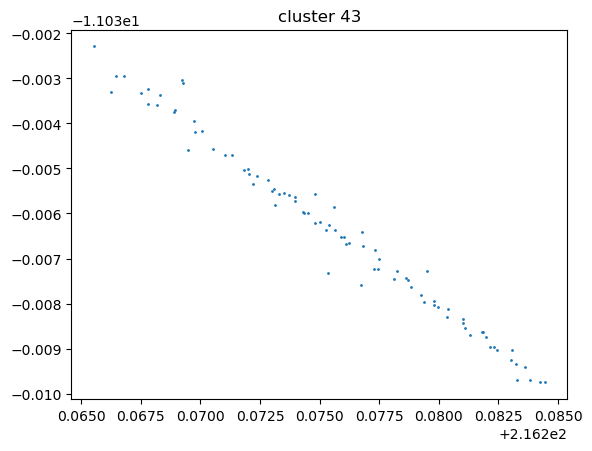

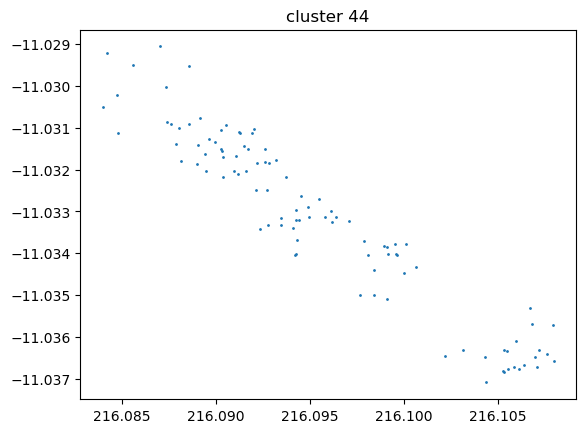

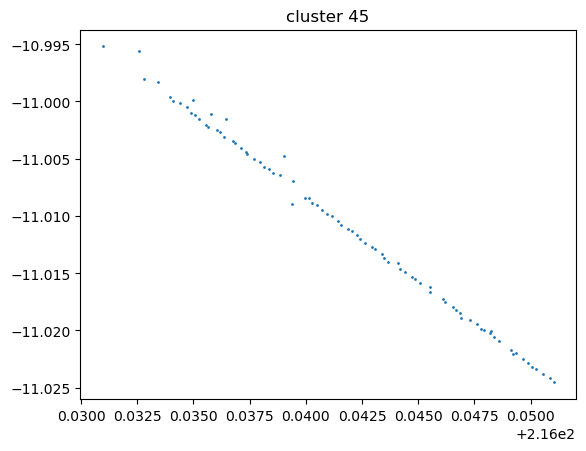

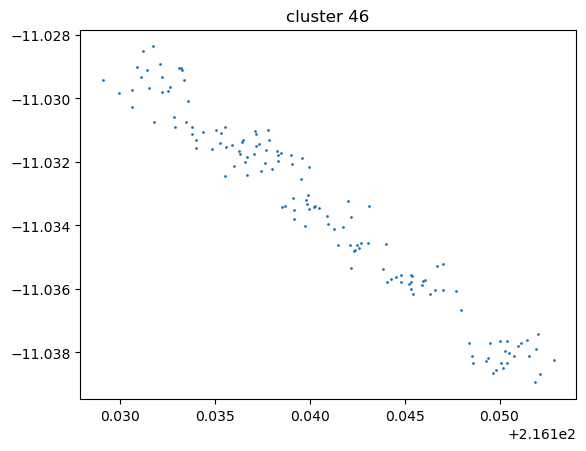

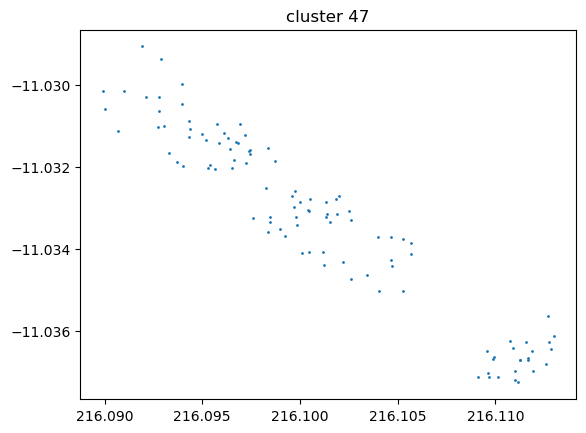

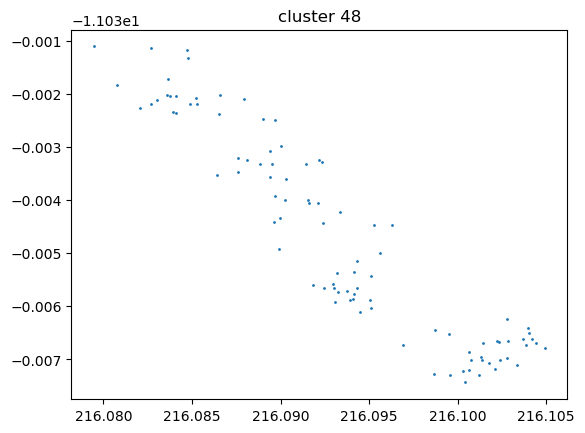

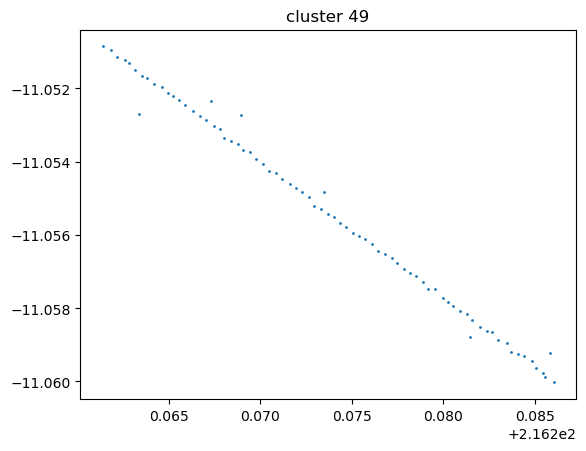

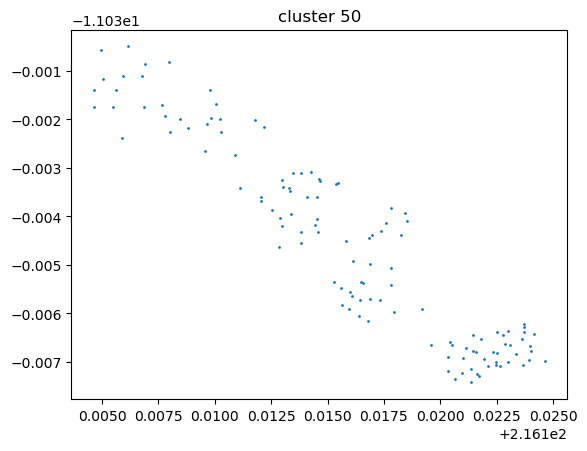

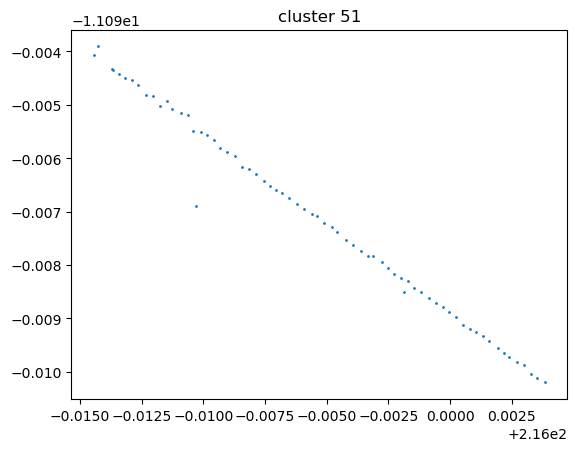

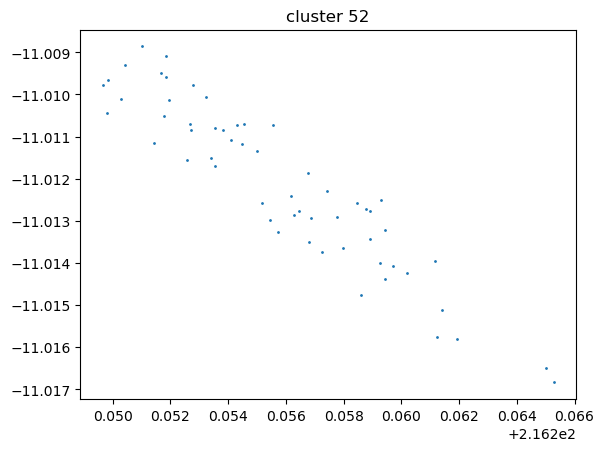

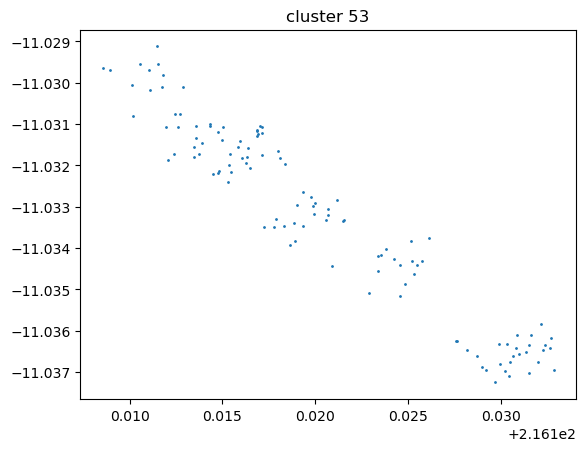

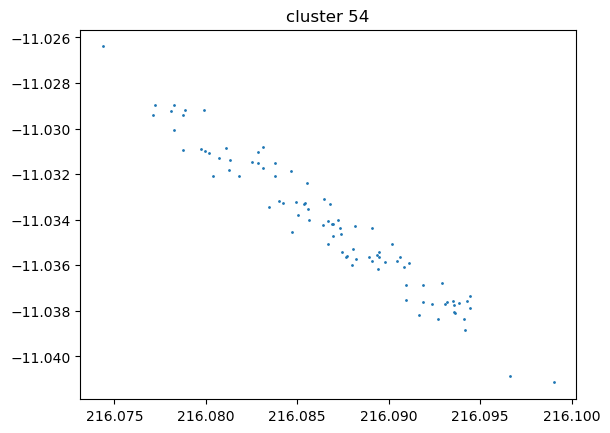

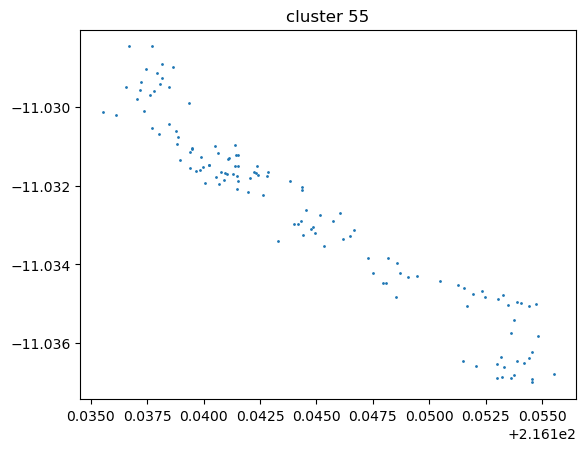

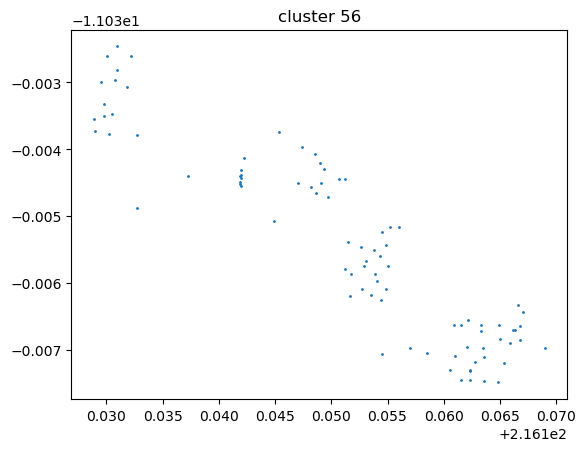

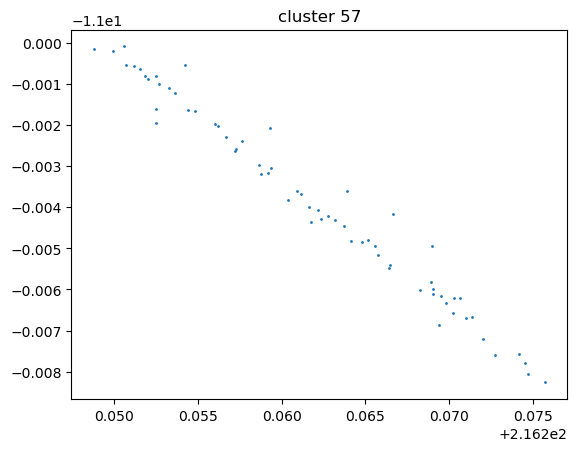

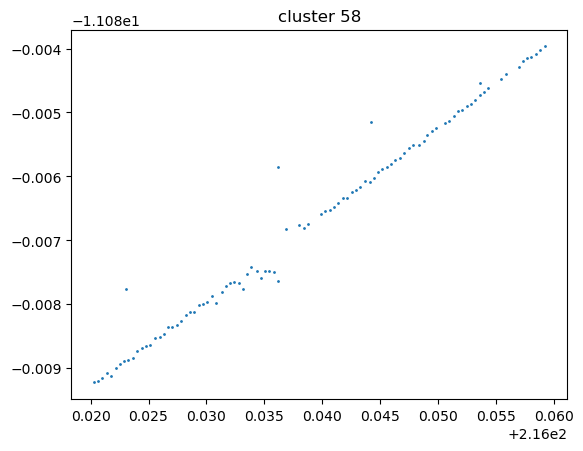

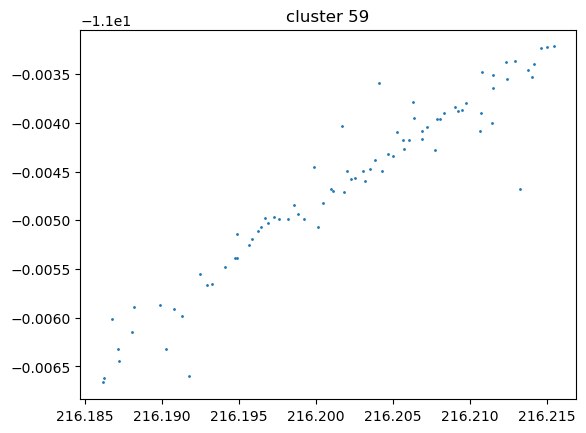

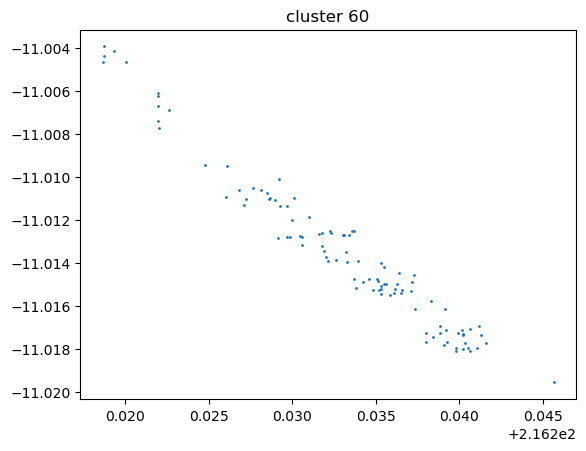


KeyboardInterrupt



In [223]:
for i, cluster in enumerate(filtered_2):
    plot_cluster(cluster, s=1)
    plt.title(f"cluster {i}")
    plt.show()

In [207]:
gather_3 = []
for cluster in filtered_2:
    gathered = x[gather(cluster.extra['line'], ra * u.deg, dec * u.deg, time * u.day, 2 * u.arcsec)]
    cluster = Cluster(gathered, {"line": cluster.extra['line']})
    gather_3.append(cluster)


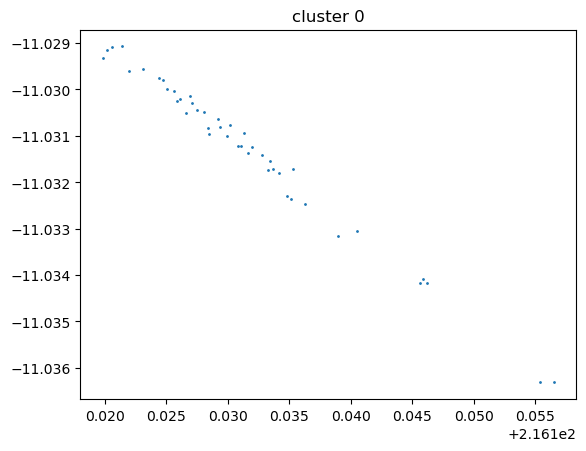

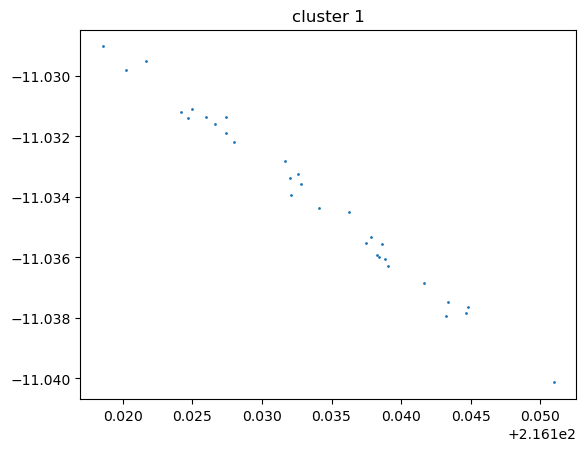

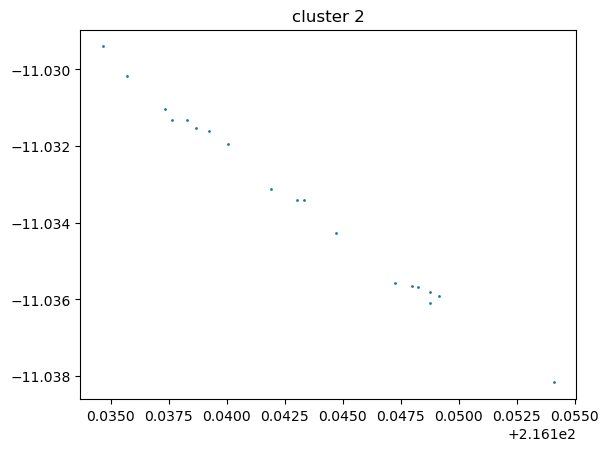

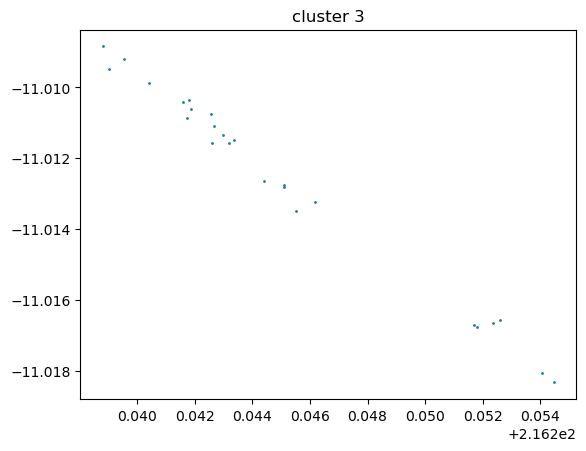

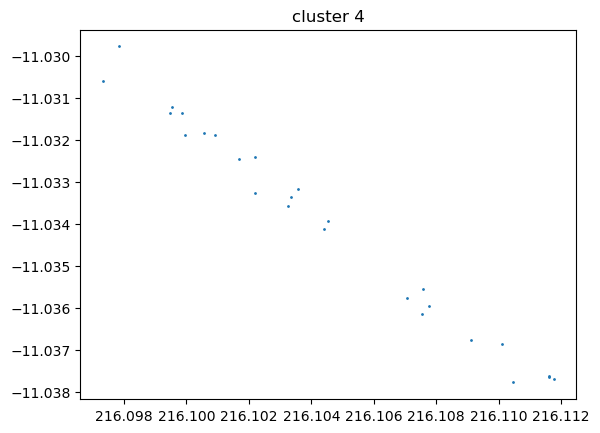

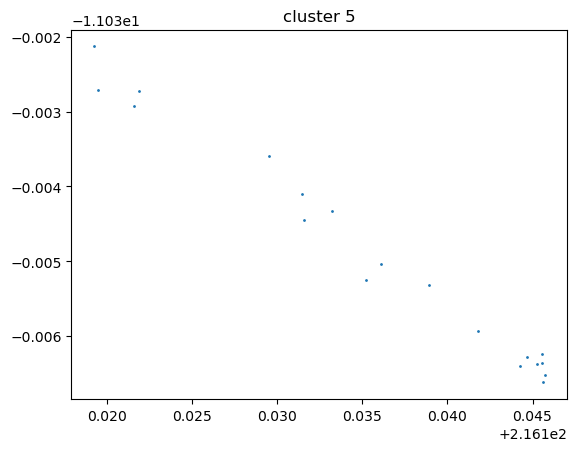

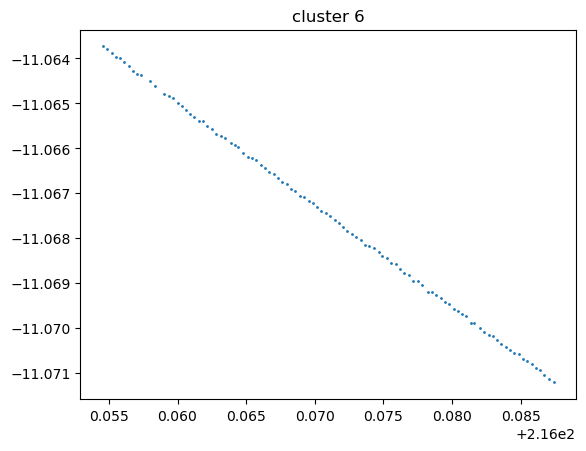

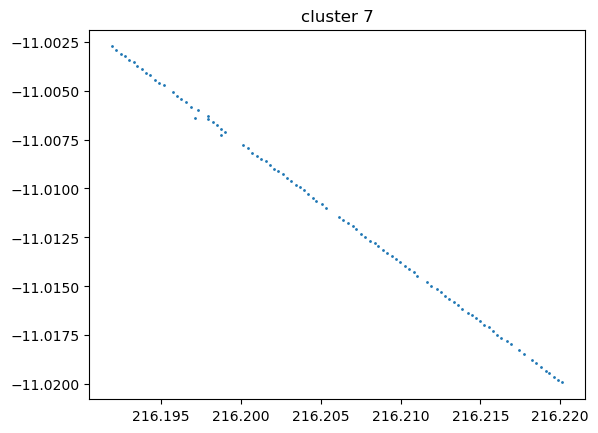

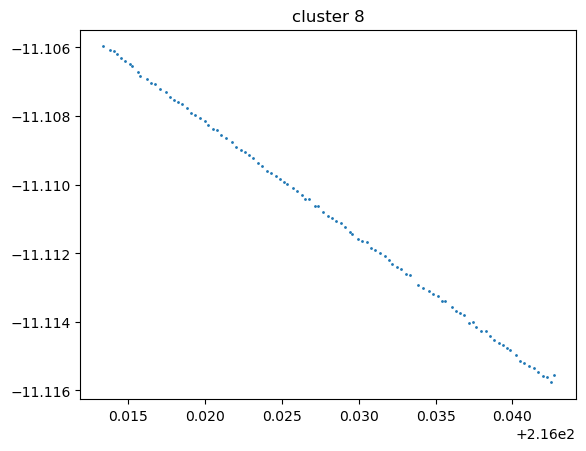

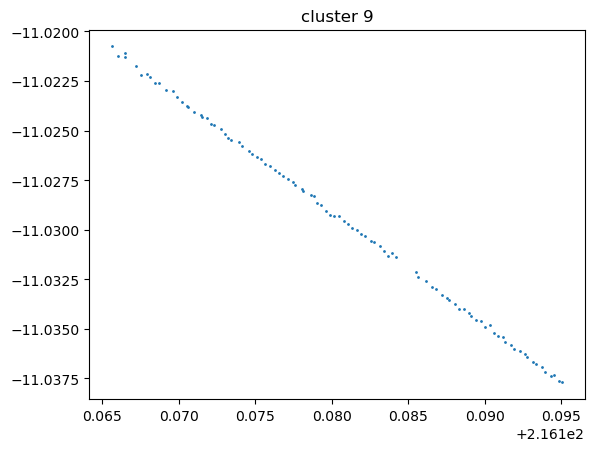

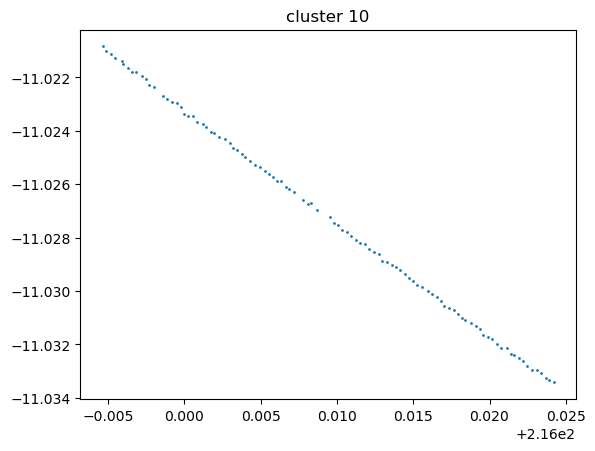

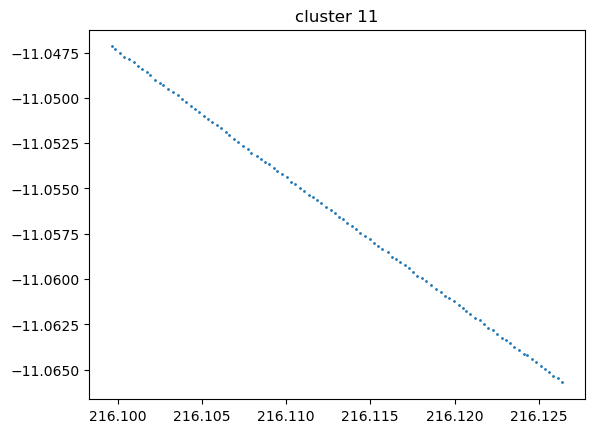

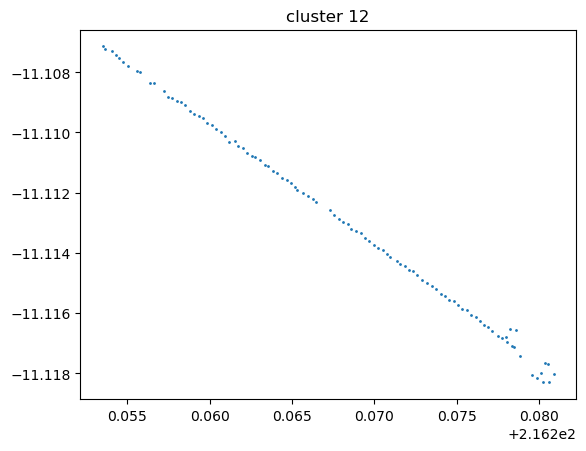

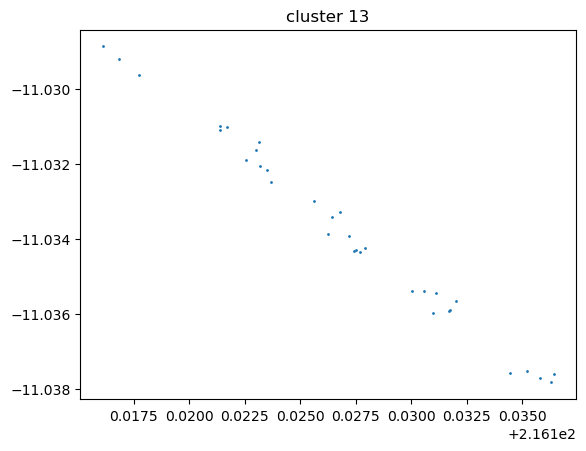

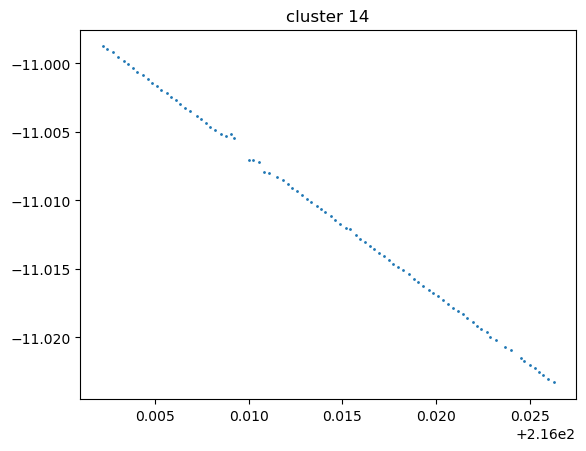

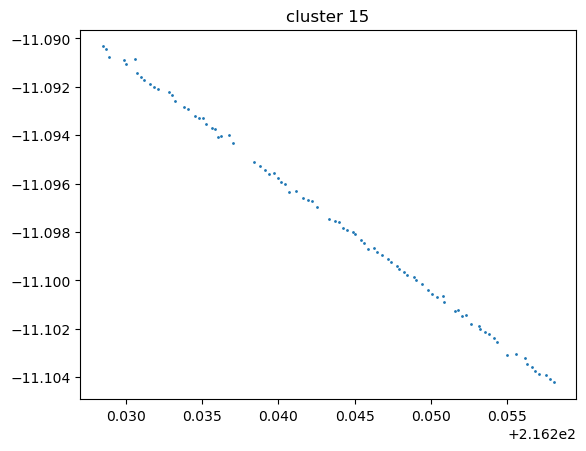

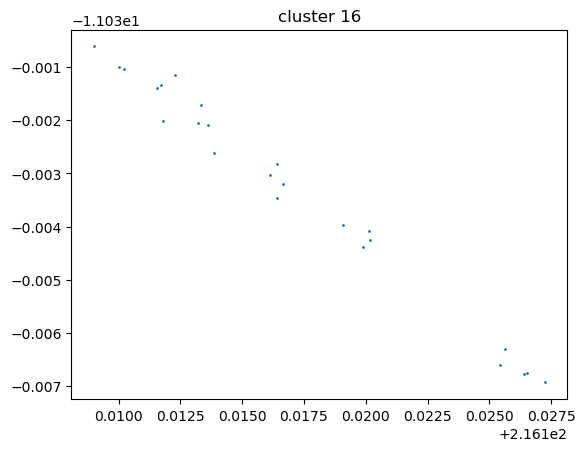

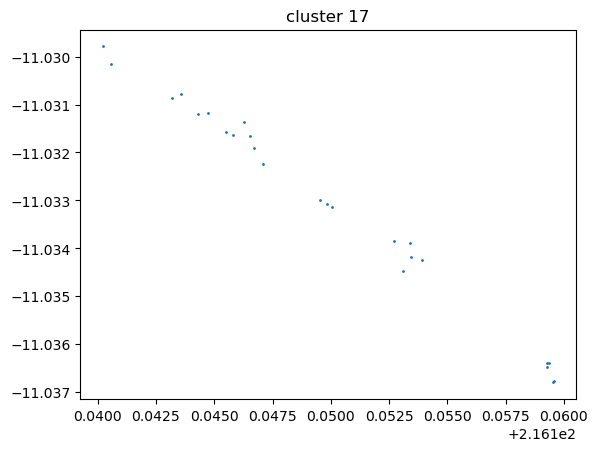

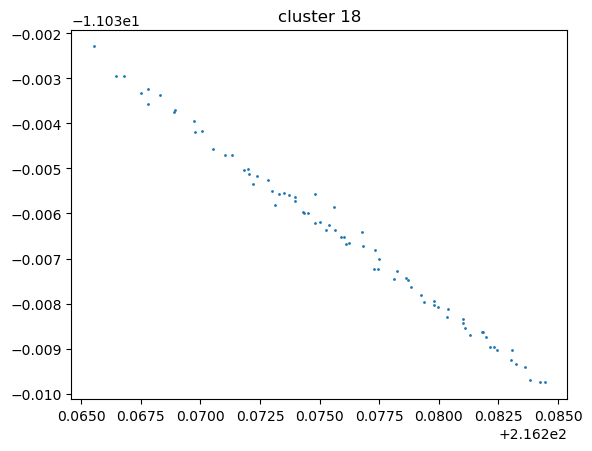

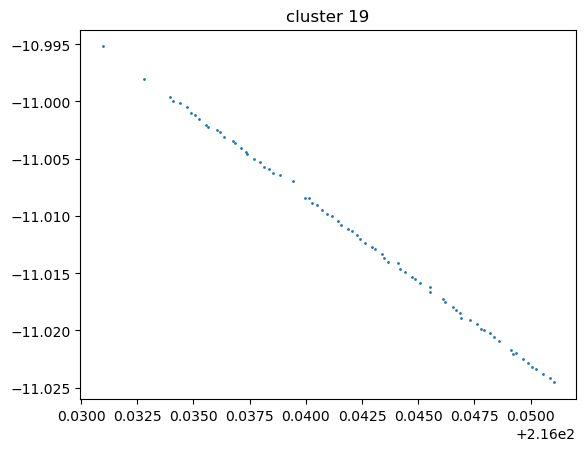

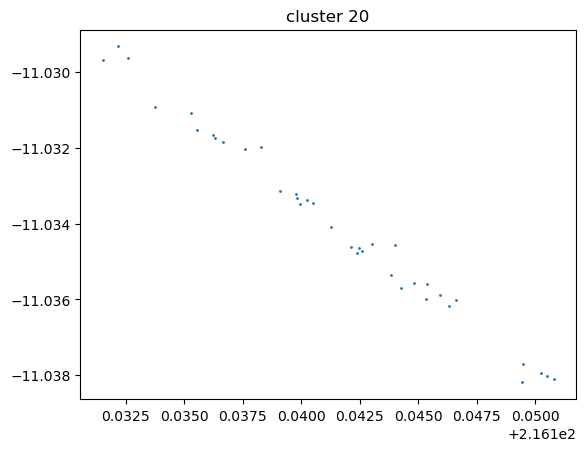

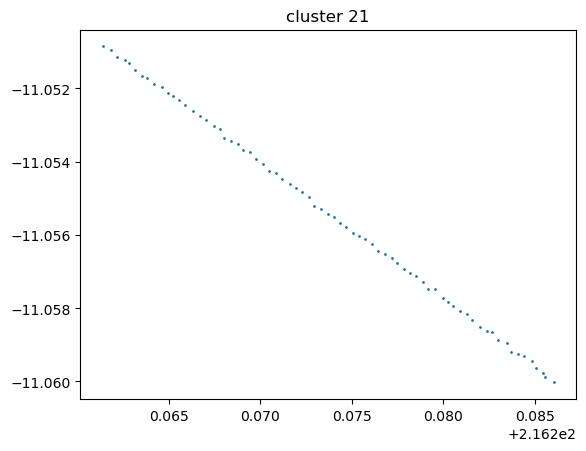

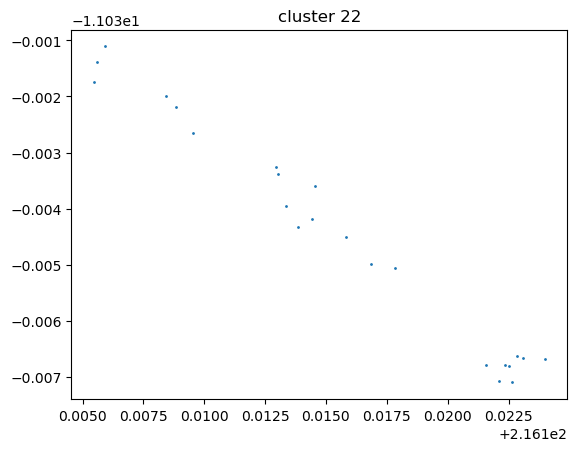

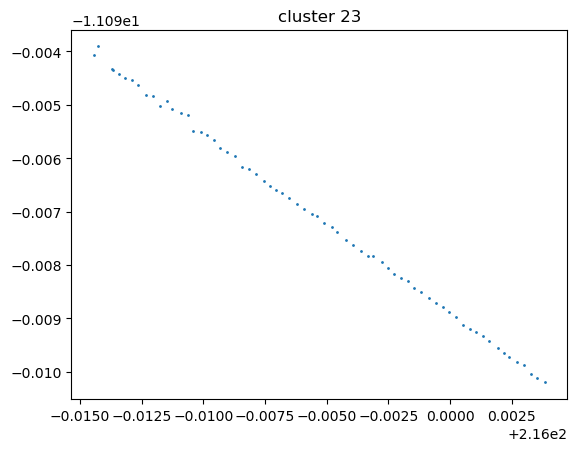

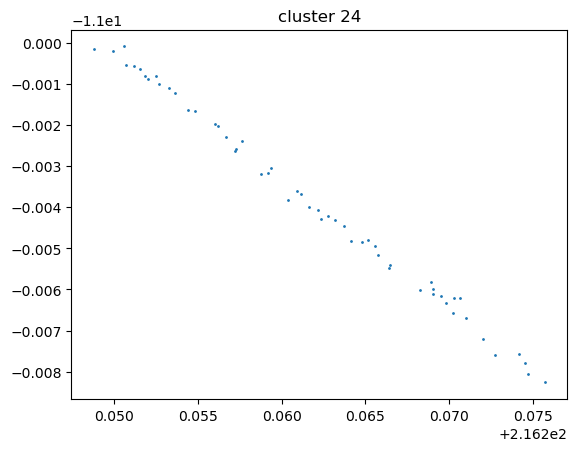

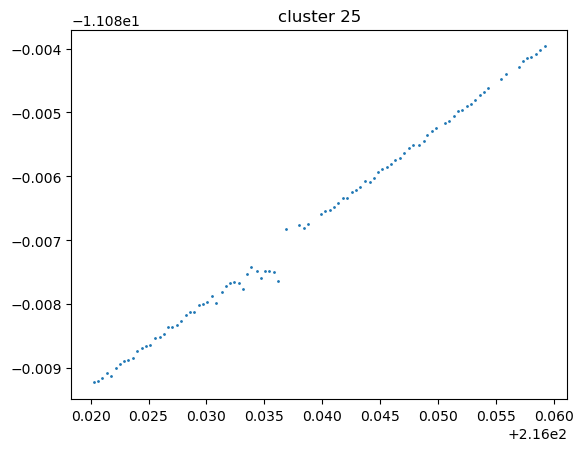

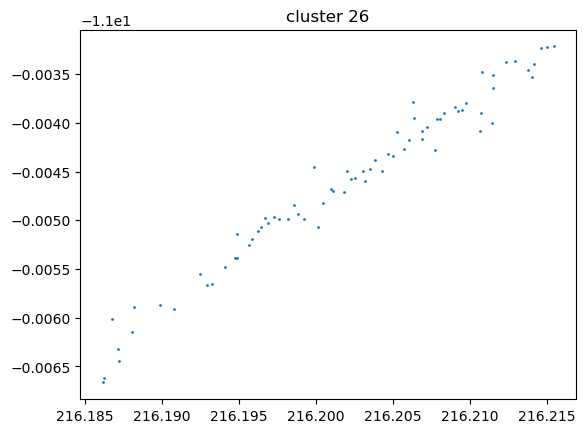

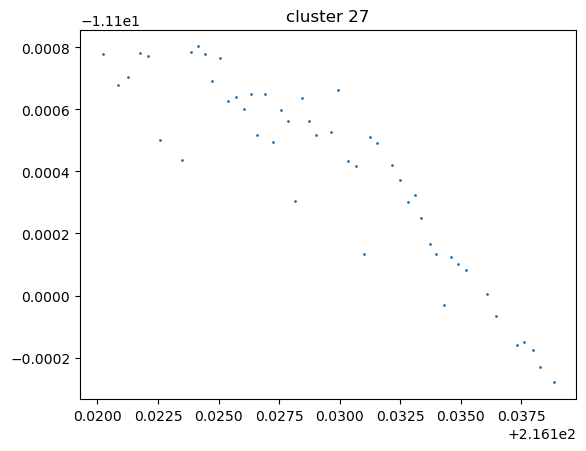

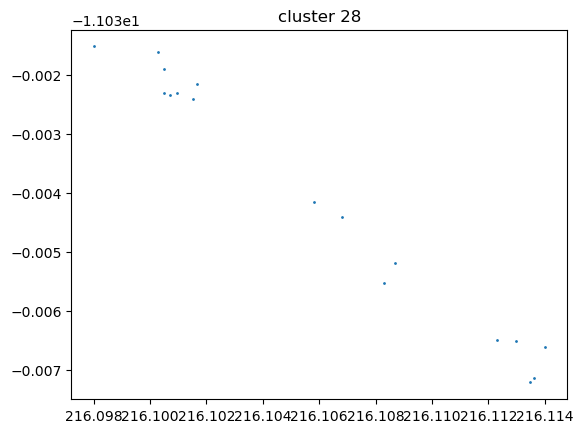

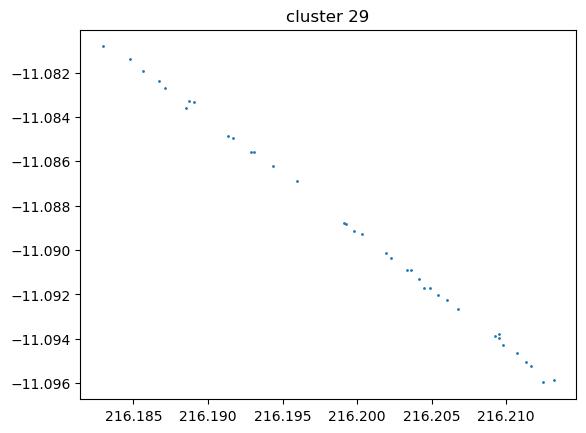

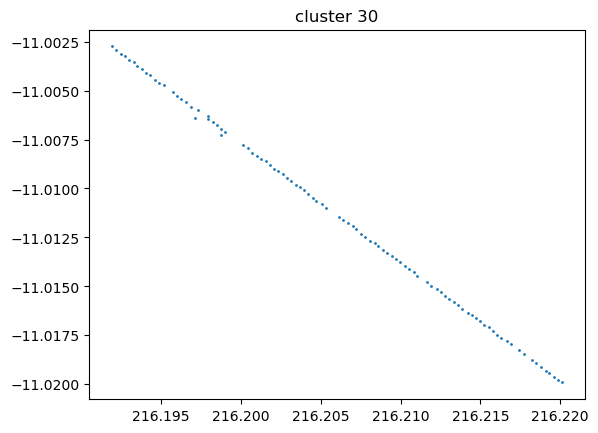

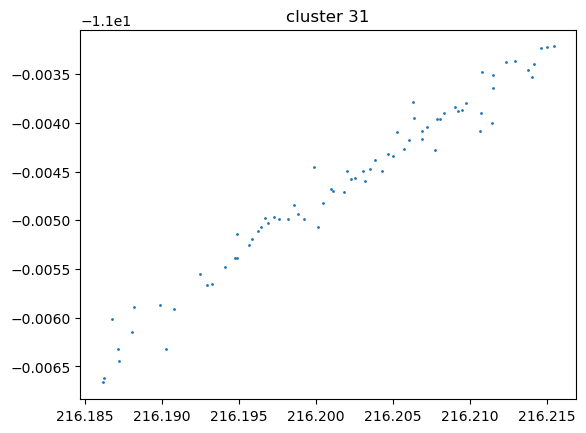

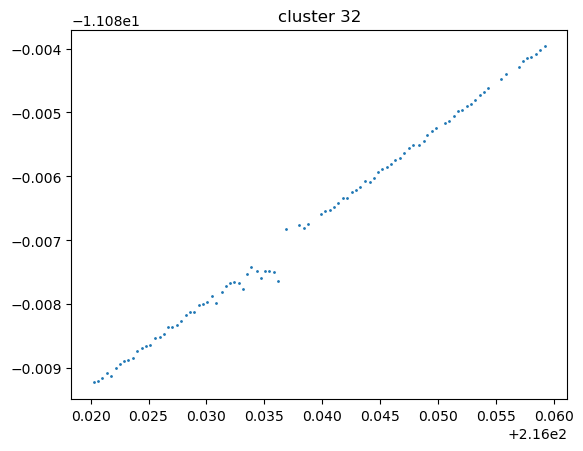

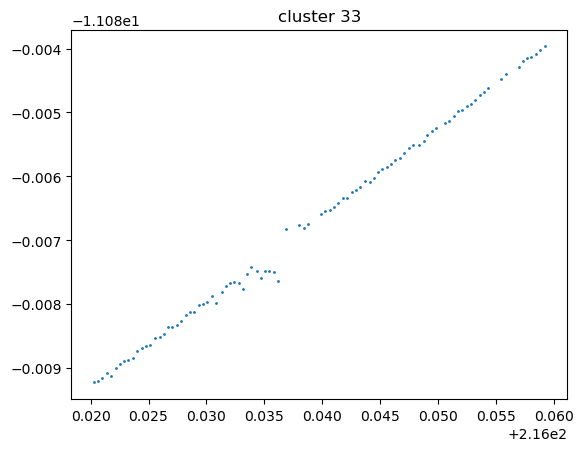

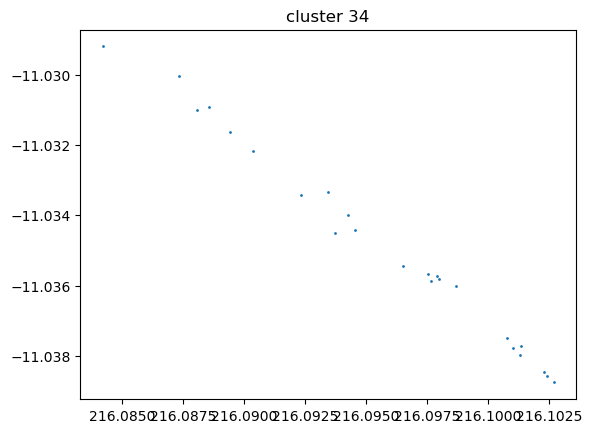

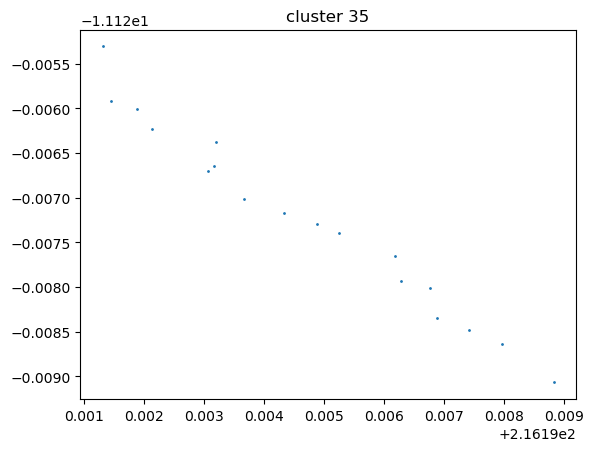

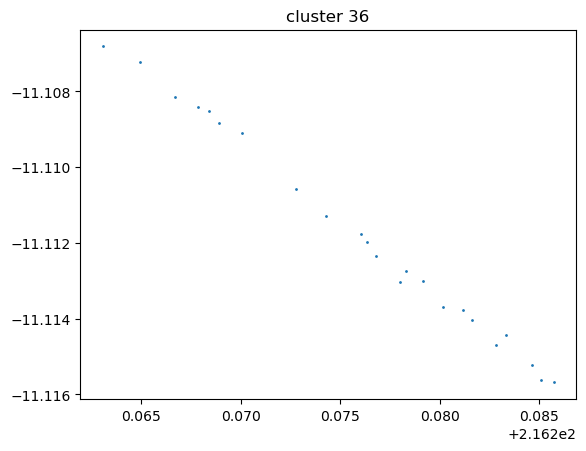

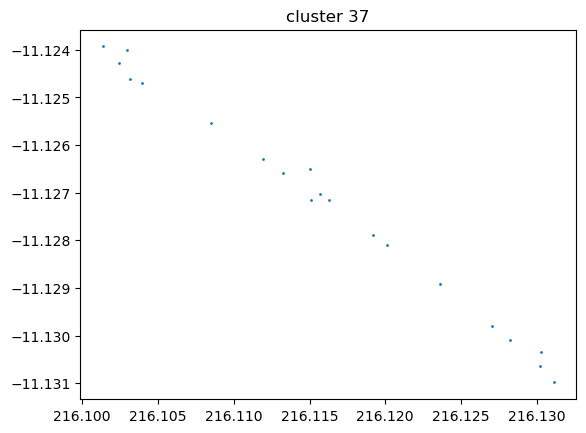

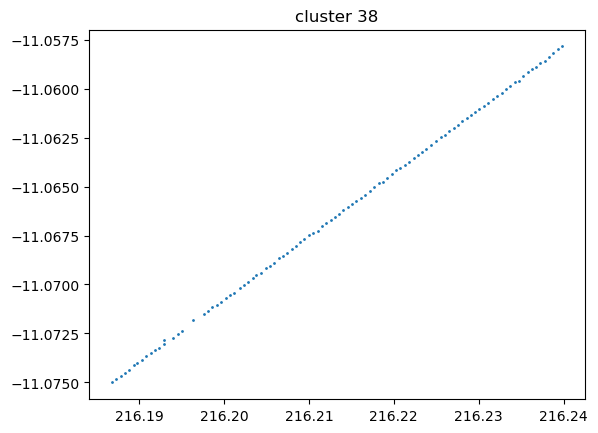

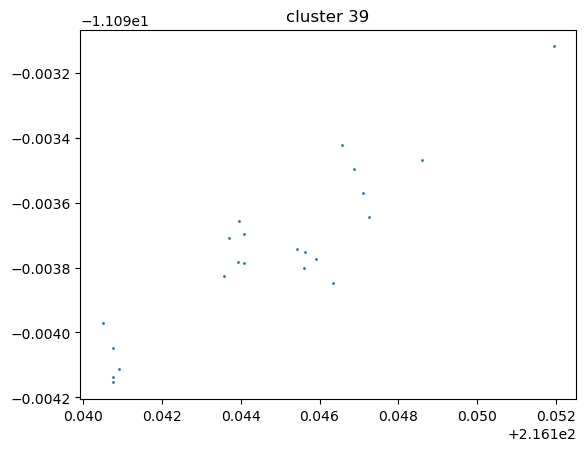

In [209]:
for i, cluster in enumerate(gather_3):
    plot_cluster(cluster, s=1)
    plt.title(f"cluster {i}")
    plt.show()

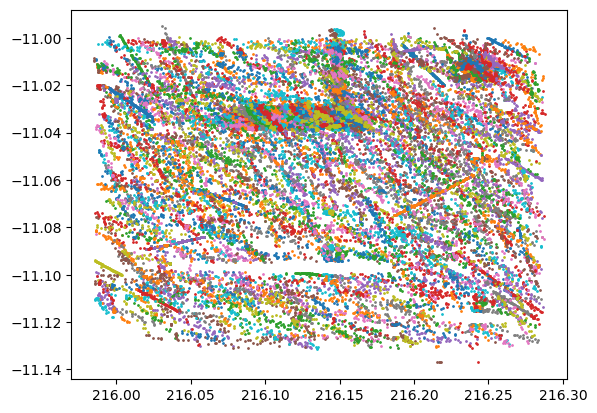

In [125]:
from salad.analysis.plot import plot_cluster

clusters = read(
    f"/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_3.0/unshuffled/refined_clusters_2_filtered.pkl"
)

fig = plt.figure()
for cluster in clusters:
    plot_cluster(cluster, s=1)

plt.show()

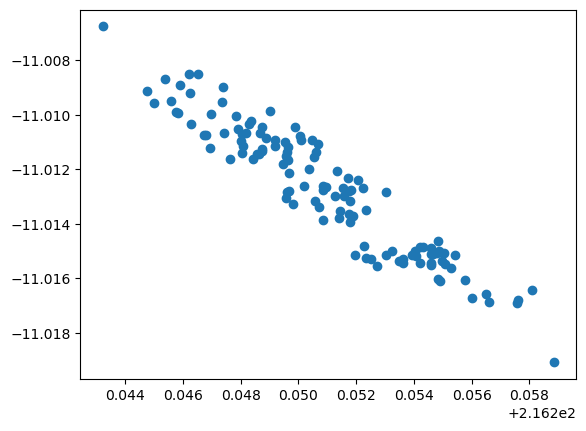

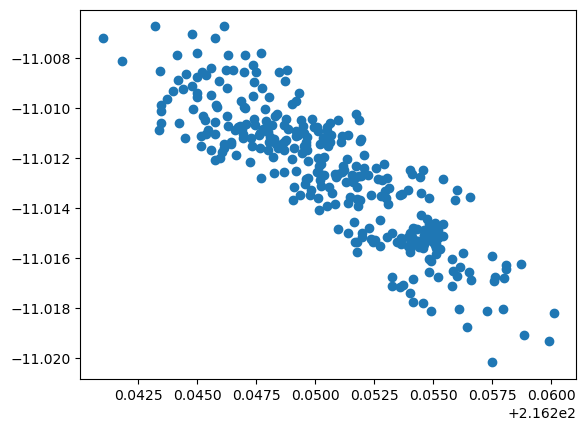

In [123]:

clusters = read(
    f"/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_3.0/unshuffled/refined_clusters_2_filtered.pkl"
)
# cluster = read(
#     f"/epyc/projects/salad/search/new_pipeline/DEEP/20190403/A0c/detector_1/snr_3.0/unshuffled/refined_clusters_2_filtered_joined_split/cluster_21_cutouts.pkl"
# )
cluster = clusters.clusters[21]

plt.scatter(cluster.points[:, 0], cluster.points[:, 1])
plt.show()

x = catalog.X()
ra = x[:, 0]
dec = x[:, 1]
time = x[:, 2]
gathered = x[gather(cluster.extra['line'], ra * u.deg, dec * u.deg, time * u.day, 10 * u.arcsec)]
plt.scatter(gathered[:, 0], gathered[:, 1])
plt.show()
